###                                                                   Competition Description

In this competition, you must explore and cleanse a dataset consisting of over ~37000 PAYGo SHS contracts to determine
the best way to predict the repayment profile. You must then build a machine learning model that returns the expected 
future payments for n months ahead (for this competition n=6).

You could empower your solution by predicting the contract repayment status label (a probability of being paid or not paid) as well. This could indicate whether the contract will be fully paid or defaulted.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Loading the data
train = pd.read_csv('data/Train.csv')
test = pd.read_csv('data/Test.csv')
metadata = pd.read_csv('data/metadata.csv', parse_dates=['RegistrationDate', 'UpsellDate', 'ExpectedTermDate', 
                                                     'FirstPaymentDate', 'LastPaymentDate'])

sample_sub = pd.read_csv('data/SampleSubmission.csv')

# EDA

### Training Data

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28007 entries, 0 to 28006
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                28007 non-null  object 
 1   TransactionDates  28007 non-null  object 
 2   PaymentsHistory   28007 non-null  object 
 3   m1                28007 non-null  float64
 4   m2                28007 non-null  float64
 5   m3                28007 non-null  float64
 6   m4                28007 non-null  float64
 7   m5                28007 non-null  float64
 8   m6                28007 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.9+ MB


In [4]:
train.head()

,ID,TransactionDates,PaymentsHistory,m1,m2,m3,m4,m5,m6
0,ID_MR53LEX,"['04-2018', '05-2018', '06-2018', '07-2018', '...","[3600.0, 750.0, 350.0, 65.0, 95.0, 135.0, 85.0...",880.0,930.0,495.0,715.0,220.0,385.0
1,ID_3D7NQUH,"['04-2018', '05-2018', '06-2018', '07-2018', '...","[2940.0, 970.0, 380.0, 880.0, 385.0, 440.0, 11...",660.0,935.0,935.0,825.0,770.0,935.0
2,ID_0IWQNPI,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2850.0, 1500.0, 1350.0, 610.0, 200.0, 250.0]",700.0,1350.0,1550.0,1400.0,1450.0,1200.0
3,ID_IY8SYB9,"['09-2017', '10-2017', '11-2017', '12-2017', '...","[2200.0, 1420.0, 1180.0, 900.0, 1400.0, 780.0,...",580.0,480.0,800.0,1260.0,1650.0,530.0
4,ID_9XHL7VZ,"['09-2017', '10-2017', '11-2017', '12-2017', '...","[2640.0, 910.0, 480.0, 280.0, 200.0, 180.0, 33...",40.0,440.0,460.0,360.0,80.0,330.0


In [5]:
train.describe()

,m1,m2,m3,m4,m5,m6
count,28007.000000,28007.000000,28007.000000,28007.000000,28007.000000,28007.000000
mean,815.411683,807.101617,797.641161,815.011033,827.719463,692.115150
std,686.130805,839.772177,696.809281,715.582046,796.379837,1416.301221
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,275.000000,250.000000,220.000000,230.000000,220.000000,130.000000
50%,820.000000,800.000000,790.000000,815.000000,840.000000,480.000000
75%,1200.000000,1200.000000,1200.000000,1200.000000,1205.000000,915.000000
max,33890.000000,94044.000000,32005.000000,33403.000000,64106.000000,96814.000000


In [6]:
print("-----Missing Values Report-------")
print(train.isna().sum())

-----Missing Values Report-------
ID                  0
TransactionDates    0
PaymentsHistory     0
m1                  0
m2                  0
m3                  0
m4                  0
m5                  0
m6                  0
dtype: int64


### Metadata

In [7]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37343 entries, 0 to 37342
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   37343 non-null  object        
 1   RegistrationDate     37343 non-null  datetime64[ns]
 2   Deposit              37343 non-null  int64         
 3   UpsellDate           973 non-null    datetime64[ns]
 4   AccessoryRate        37343 non-null  float64       
 5   PaymentMethod        37343 non-null  object        
 6   rateTypeEntity       37343 non-null  object        
 7   RatePerUnit          37343 non-null  int64         
 8   DaysOnDeposit        37343 non-null  int64         
 9   MainApplicantGender  37343 non-null  object        
 10  Age                  30404 non-null  float64       
 11  Region               35409 non-null  object        
 12  Town                 37343 non-null  object        
 13  Occupation           37343 non-

In [8]:
metadata.replace({"Town":{"UNKNOWN":np.nan}}, inplace=True)

In [9]:
print("-----Missing Values Report-------")
print(metadata.isna().sum())

-----Missing Values Report-------
ID                         0
RegistrationDate           0
Deposit                    0
UpsellDate             36370
AccessoryRate              0
PaymentMethod              0
rateTypeEntity             0
RatePerUnit                0
DaysOnDeposit              0
MainApplicantGender        0
Age                     6939
Region                  1934
Town                    1934
Occupation                 0
SupplierName               0
Term                       0
TotalContractValue         0
ExpectedTermDate           0
FirstPaymentDate           0
LastPaymentDate            0
dtype: int64


### Test Data

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9336 entries, 0 to 9335
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                9336 non-null   object
 1   TransactionDates  9336 non-null   object
 2   PaymentsHistory   9336 non-null   object
dtypes: object(3)
memory usage: 218.9+ KB


In [11]:
test.head()

,ID,TransactionDates,PaymentsHistory
0,ID_6L67PAA,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4000.0, 1050.0, 1050.0, 1050.0, 1050.0, 400.0]"
1,ID_VJ80SX2,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[3000.0, 850.0, 750.0, 1500.0, 650.0, 1250.0, ..."
2,ID_7OU9HLK,"['12-2015', '01-2016', '03-2016', '05-2016', '...","[2400.0, 300.0, 500.0, 450.0, 675.0, 700.0, 87..."
3,ID_WVWTPGK,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4700.0, 1200.0, 950.0, 1200.0, 900.0, 1110.0,..."
4,ID_04DSDQS,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4800.0, 750.0, 995.0, 995.0, 1300.0, 750.0, 1..."


### Sample Submission

In [12]:
sample_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56016 entries, 0 to 56015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      56016 non-null  object 
 1   Target  56016 non-null  float64
dtypes: float64(1), object(1)
memory usage: 875.4+ KB


In [13]:
sample_sub.head(7)

,ID,Target
0,ID_6L67PAA x m1,0.0
1,ID_6L67PAA x m2,0.0
2,ID_6L67PAA x m3,0.0
3,ID_6L67PAA x m4,0.0
4,ID_6L67PAA x m5,0.0
5,ID_6L67PAA x m6,0.0
6,ID_VJ80SX2 x m1,0.0


### Merged Datasets

In [14]:
merged = pd.merge(left=metadata, right=pd.concat(objs=[train, test]), on="ID")
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37343 entries, 0 to 37342
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   37343 non-null  object        
 1   RegistrationDate     37343 non-null  datetime64[ns]
 2   Deposit              37343 non-null  int64         
 3   UpsellDate           973 non-null    datetime64[ns]
 4   AccessoryRate        37343 non-null  float64       
 5   PaymentMethod        37343 non-null  object        
 6   rateTypeEntity       37343 non-null  object        
 7   RatePerUnit          37343 non-null  int64         
 8   DaysOnDeposit        37343 non-null  int64         
 9   MainApplicantGender  37343 non-null  object        
 10  Age                  30404 non-null  float64       
 11  Region               35409 non-null  object        
 12  Town                 35409 non-null  object        
 13  Occupation           37343 non-

In [15]:
merged.head(3)

,ID,RegistrationDate,Deposit,UpsellDate,AccessoryRate,PaymentMethod,rateTypeEntity,RatePerUnit,DaysOnDeposit,MainApplicantGender,...,FirstPaymentDate,LastPaymentDate,TransactionDates,PaymentsHistory,m1,m2,m3,m4,m5,m6
0,ID_K00S4N4,2015-12-10,2000,NaT,0.0,FINANCED,DAILY,35,7,Male,...,2015-12-10 09:52:35,2016-10-23 04:52:30,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[3050.0, 1050.0, 910.0, 1050.0, 1050.0]",1225.0,1050.0,1190.0,525.0,1750.0,1890.0
1,ID_6L67PAA,2015-12-09,2000,NaT,0.0,FINANCED,DAILY,35,7,Male,...,2015-12-09 13:14:03,2020-05-24 15:32:18,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4000.0, 1050.0, 1050.0, 1050.0, 1050.0, 400.0]",NaN,NaN,NaN,NaN,NaN,NaN
2,ID_102CV85,2015-12-18,2000,2018-03-29 10:14:58,35.0,FINANCED,DAILY,35,7,Female,...,2015-12-18 06:22:34,2017-02-01 15:23:44,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4245.0, 980.0, 735.0, 735.0, 1470.0, 735.0, 9...",980.0,980.0,1225.0,980.0,935.0,355.0


In [16]:
# Analysing transaction dates
merged.TransactionDates.head()

0    ['12-2015', '01-2016', '02-2016', '03-2016', '...
1    ['12-2015', '01-2016', '02-2016', '03-2016', '...
2    ['12-2015', '01-2016', '02-2016', '03-2016', '...
3    ['11-2015', '12-2015', '01-2016', '02-2016', '...
4    ['12-2015', '01-2016', '02-2016', '03-2016', '...
Name: TransactionDates, dtype: object

In [17]:
# Analysing PaymentMethod dates
merged.PaymentMethod.value_counts()

FINANCED    37343
Name: PaymentMethod, dtype: int64

In [18]:
# Analysing PaymentMethod dates
merged.rateTypeEntity.value_counts()

DAILY      37168
MONTHLY       97
WEEKLY        78
Name: rateTypeEntity, dtype: int64

In [19]:
# Analysing Gender dates
merged.MainApplicantGender.value_counts()

Male      23351
Female    13992
Name: MainApplicantGender, dtype: int64

In [20]:
# Analysing Region dates
merged.Region.value_counts()

Nyanza                6998
North Rift            5344
Nairobi Region        5056
South Rift            4759
Coast Region          4671
Western               4508
Mount Kenya Region    4073
Name: Region, dtype: int64

In [21]:
# Analysing Town dates
# merged.Town.value_counts() ... has more than 10

In [22]:
# Analysing Occupation types
merged.Occupation.value_counts()

Business                  12380
Farmer                    11747
Labourer                   5228
Other                      2770
Driver/Motorbike Rider     2384
Teacher                    1830
Government Employee        1004
Name: Occupation, dtype: int64

In [23]:
# Term - number of contract days
merged.Term.describe()

count    37343.000000
mean       412.427657
std        121.602544
min         10.000000
25%        364.000000
50%        364.000000
75%        547.000000
max        626.000000
Name: Term, dtype: float64

In [24]:
merged.Term.plot.kde()

<AxesSubplot:ylabel='Density'>

In [25]:
# Description of metadata
metadata.describe()

,Deposit,AccessoryRate,RatePerUnit,DaysOnDeposit,Age,Term,TotalContractValue
count,37343.000000,37343.000000,37343.000000,37343.000000,30404.000000,37343.000000,37343.000000
mean,2348.631685,1.136090,49.923868,4.600835,38.855677,412.427657,22953.005142
std,417.814614,7.791789,57.500215,3.429060,12.300827,121.602544,10149.863172
min,0.000000,0.000000,35.000000,0.000000,19.000000,10.000000,10800.000000
25%,2000.000000,0.000000,40.000000,3.000000,29.000000,364.000000,16560.000000
50%,2000.000000,0.000000,40.000000,3.000000,36.000000,364.000000,16560.000000
75%,2500.000000,0.000000,55.000000,7.000000,46.000000,547.000000,33080.000000
max,8000.000000,240.000000,4000.000000,60.000000,120.000000,626.000000,64484.000000


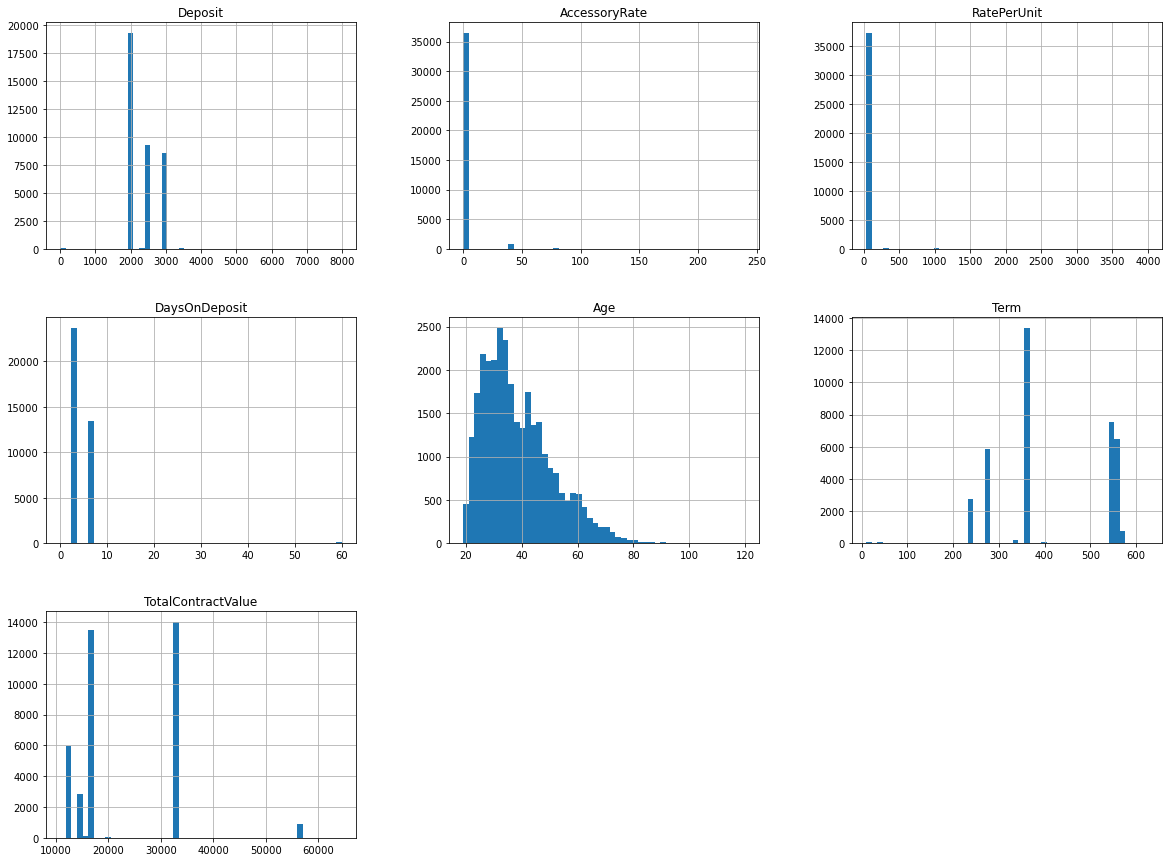

In [26]:
%matplotlib inline
num_cols = ["Deposit", "AccessoryRate", "RatePerUnit", "DaysOnDeposit", "Age", "Term", "TotalContractValue"]

metadata[num_cols].hist(bins=50, figsize=(20,15))
plt.show()

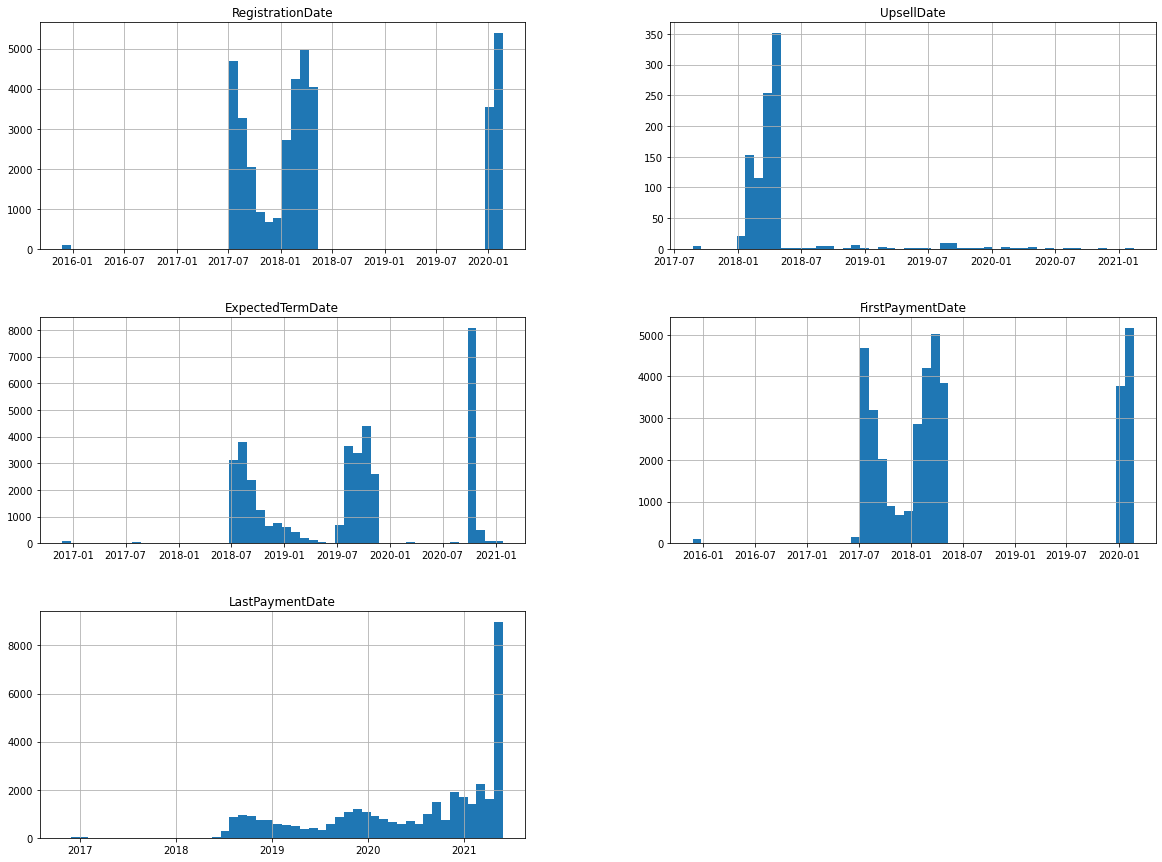

In [27]:
# Description of payment dates
dates =  ["RegistrationDate", "UpsellDate", "ExpectedTermDate", "FirstPaymentDate", "LastPaymentDate"]

metadata[dates].hist(bins=50, figsize=(20,15))
plt.show()

In [28]:
# Description of training set
train.describe()

,m1,m2,m3,m4,m5,m6
count,28007.000000,28007.000000,28007.000000,28007.000000,28007.000000,28007.000000
mean,815.411683,807.101617,797.641161,815.011033,827.719463,692.115150
std,686.130805,839.772177,696.809281,715.582046,796.379837,1416.301221
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,275.000000,250.000000,220.000000,230.000000,220.000000,130.000000
50%,820.000000,800.000000,790.000000,815.000000,840.000000,480.000000
75%,1200.000000,1200.000000,1200.000000,1200.000000,1205.000000,915.000000
max,33890.000000,94044.000000,32005.000000,33403.000000,64106.000000,96814.000000


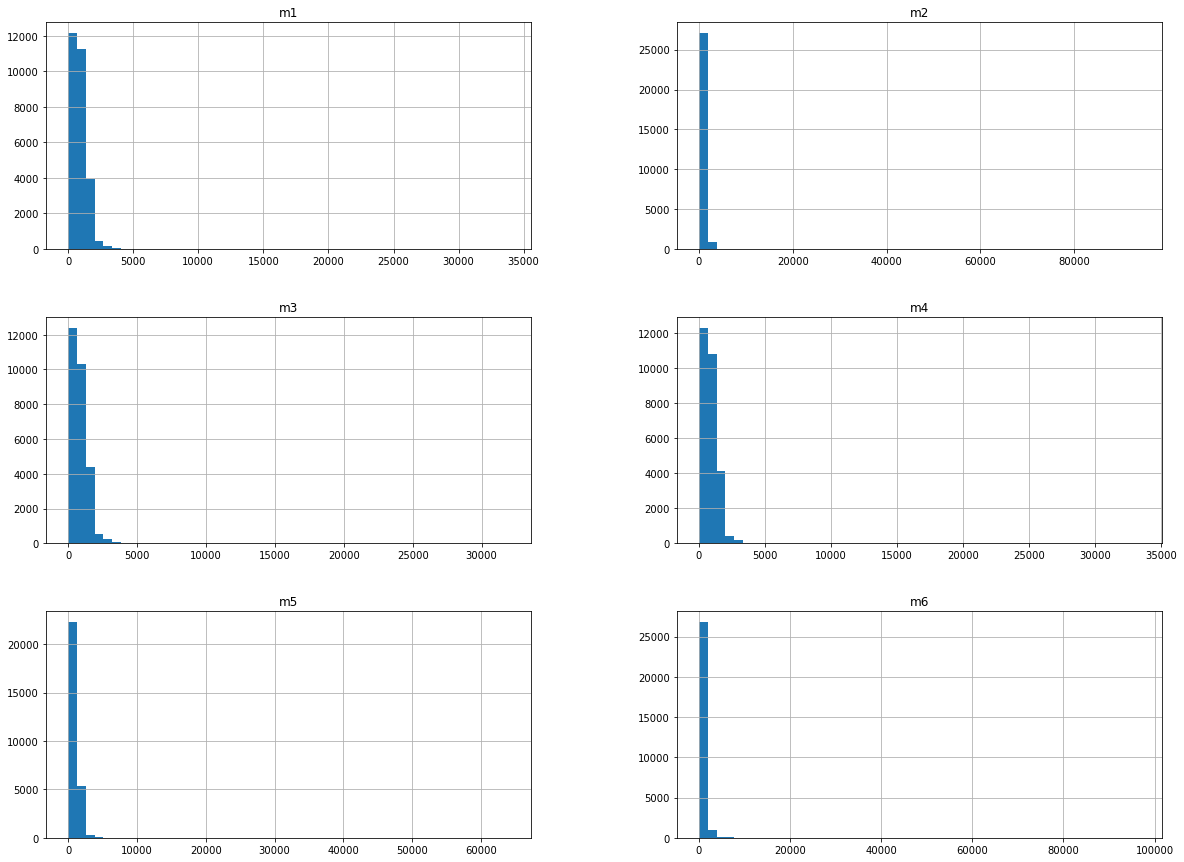

In [29]:
# Monthly payments plots
monthly_payments = ["m1", "m2", "m3", "m4", "m5", "m6"]

train[monthly_payments].hist(bins=50, figsize=(20,15))
plt.show()

In [30]:
# Making a copy of the original df to avoid distortions
merged_2 = merged.copy()

In [31]:
merged_2["RegistrationYear"] = merged_2["RegistrationDate"].dt.year
merged_2["RegistrationMonth"] = merged_2["RegistrationDate"].dt.month
merged_2["RegistrationDay"] = merged_2["RegistrationDate"].dt.day
merged_2["RegistrationDayofWeek"] = merged_2["RegistrationDate"].dt.dayofweek

In [32]:
merged_2[["RegistrationYear", "RegistrationMonth", "RegistrationDay", "RegistrationDayofWeek"]].head()

,RegistrationYear,RegistrationMonth,RegistrationDay,RegistrationDayofWeek
0,2015,12,10,3
1,2015,12,9,2
2,2015,12,18,4
3,2015,11,25,2
4,2015,12,2,2


In [33]:
merged_2["UpsellYear"] = merged_2["UpsellDate"].dt.year
merged_2["UpsellMonth"] = merged_2["UpsellDate"].dt.month
merged_2["UpsellDay"] = merged_2["UpsellDate"].dt.day
merged_2["UpsellDayofWeek"] = merged_2["UpsellDate"].dt.dayofweek

# Creating new year-month-day columns out of expected Term date 
merged_2["ExpectedTermYear"] = merged_2["ExpectedTermDate"].dt.year
merged_2["ExpectedTermMonth"] = merged_2["ExpectedTermDate"].dt.month
merged_2["ExpectedTermDay"] = merged_2["ExpectedTermDate"].dt.day
merged_2["ExpectedTermDayofWeek"] = merged_2["ExpectedTermDate"].dt.dayofweek

# Creating new year-month-day columns out of First Payment Date 
merged_2["FirstPaymentYear"] = merged_2["FirstPaymentDate"].dt.year
merged_2["FirstPaymentMonth"] = merged_2["FirstPaymentDate"].dt.month
merged_2["FirstPaymentDay"] = merged_2["FirstPaymentDate"].dt.day
merged_2["FirstPaymentDayofWeek"] = merged_2["FirstPaymentDate"].dt.dayofweek
merged_2["FirstPaymentDate"].head()

# Creating new year-month-day columns out of Last Payment Date 
merged_2["LastPaymentYear"] = merged_2["LastPaymentDate"].dt.year
merged_2["LastPaymentMonth"] = merged_2["LastPaymentDate"].dt.month
merged_2["LastPaymentDay"] = merged_2["LastPaymentDate"].dt.day
merged_2["LastPaymentDayofWeek"] = merged_2["LastPaymentDate"].dt.dayofweek

In [34]:
merged_2.head()

,ID,RegistrationDate,Deposit,UpsellDate,AccessoryRate,PaymentMethod,rateTypeEntity,RatePerUnit,DaysOnDeposit,MainApplicantGender,...,ExpectedTermDay,ExpectedTermDayofWeek,FirstPaymentYear,FirstPaymentMonth,FirstPaymentDay,FirstPaymentDayofWeek,LastPaymentYear,LastPaymentMonth,LastPaymentDay,LastPaymentDayofWeek
0,ID_K00S4N4,2015-12-10,2000,NaT,0.0,FINANCED,DAILY,35,7,Male,...,8,3,2015,12,10,3,2016,10,23,6
1,ID_6L67PAA,2015-12-09,2000,NaT,0.0,FINANCED,DAILY,35,7,Male,...,7,2,2015,12,9,2,2020,5,24,6
2,ID_102CV85,2015-12-18,2000,2018-03-29 10:14:58,35.0,FINANCED,DAILY,35,7,Female,...,13,4,2015,12,18,4,2017,2,1,2
3,ID_HXBJFHB,2015-11-25,2000,NaT,0.0,FINANCED,DAILY,35,7,Female,...,23,2,2015,11,25,2,2017,5,22,0
4,ID_3K9VZ5J,2015-12-02,2000,NaT,0.0,FINANCED,DAILY,35,7,Female,...,30,2,2015,12,5,5,2017,5,12,4


### Extracting full train and test set data

In [36]:
# extracting test and train ids
train_ids = train.ID.tolist()
sub_ids = test.ID.tolist()

# function to split complete test and train set ids
def train_test_extractor(df, t1_ids, t2_ids):
    # t1_ids = train_ids, t2_ids = test_ids
    t1 = merged[merged.ID.isin(t1_ids)]
    t2 = merged[merged.ID.isin(t2_ids)]
    return t1, t2

train,sub = train_test_extractor(merged, train_ids, sub_ids)
#X = X.reset_index().drop("index", axis=1)
#X_sub = X_sub.reset_index().drop("index", axis=1)

# Dropping leaked vaiable LastPaymentDate 
train = train.drop("LastPaymentDate", axis=1)

sub = sub.drop("LastPaymentDate", axis=1)

In [37]:
print("Metadata format: ", metadata.shape)
print("Old Train dataset format: ", train.shape)
print("New train dataset format: ", train.shape)
print("Submission dataset format: ", sub.shape)
print("test set data format: ", test.shape)

Metadata format:  (37343, 20)
Old Train dataset format:  (28007, 27)
New train dataset format:  (28007, 27)
Submission dataset format:  (9336, 27)
test set data format:  (9336, 3)


In [38]:
# Splitting the labels and values data
X = train.drop(monthly_payments, axis=1)
y = train[monthly_payments].copy()

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# Creating a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Extracting categorical columns, numerical columns and date type columns
num_features = X_train.select_dtypes('number').columns.tolist()
cat_features = ["PaymentMethod", "rateTypeEntity", "rateTypeEntity", "MainApplicantGender", "Region", "Town", "Occupation",
               "SupplierName"]
date_features = X_train.select_dtypes('datetime64[ns]').columns.tolist()

## Model 1: No adjustments

In [41]:
# Extracting categorical columns, numerical columns and date type columns
num_features = X_train.select_dtypes('number').columns.tolist()
cat_features = ["PaymentMethod", "rateTypeEntity", "MainApplicantGender", "Region", "Town", "Occupation",
               "SupplierName"]
date_features = X_train.select_dtypes('datetime64[ns]').columns.tolist()

categ_features = cat_features + date_features

In [42]:
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet, Lars, LassoLars, BayesianRidge, LassoCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error

In [44]:
#Custom transformer to return a dense matrix instead of a sparse matrix
class DenseMatrixTrans(BaseEstimator, TransformerMixin):
    def __init__(self):
        return None
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if not isinstance(X, np.ndarray):
            X = X.todense()
        return X

In [45]:
#Numerical pipeline
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler())
])

#Categorical pipeline
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder())  
])

#Column Transformer
ct = ColumnTransformer([
    ("numerical", num_pipe, num_features),
    ("categorical", cat_pipe, cat_features)
])

# Model 1
model_1 = Pipeline([
    ("transformer", ct),
    ("dense_matrx", DenseMatrixTrans()),
    ("regressor", LinearRegression())
])

In [46]:
model_1.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Deposit', 'AccessoryRate',
                                                   'RatePerUnit',
                                                   'DaysOnDeposit', 'Age',
                                                   'Term',
                                                   'TotalContractValue']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                               

In [47]:
#Scores
print("Model 1 training score is {}" .format(model_1.score(X_train, y_train)))
print("Model 1 testing score is {}" .format(model_1.score(X_test, y_test)))

Model 1 training score is 0.1138241754188568
Model 1 testing score is 0.13693905725012395


In [48]:
# Test run
some_data = X_train[:10]
some_labels = y_train[:10]

# Predicting some data
model_1.predict(some_data)[:4]

array([[ 639.    ,  660.1875,  640.75  ,  695.5   ,  696.75  ,  604.5   ],
       [ 929.5   ,  927.375 ,  932.375 ,  958.5   ,  952.625 ,  746.    ],
       [1051.    , 1025.4375,  966.875 , 1053.5   , 1060.75  ,  863.    ],
       [ 851.    ,  820.0625,  747.375 ,  779.    ,  887.    ,  482.5   ]])

### Custom Transformer Design: Adding PaymentsHistorySum & Number of Historical Payments Attributes

In [49]:
# Custom transformer that extracts columns as passed to its constructor
class FeaturesSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names):
        self.feature_names = feature_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.feature_names]

In [50]:
# Custom numerical transformer
class NumericalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, PaymentsHistorySum = True, NumHistPayments = True):
        self.PaymentsHistorySum = PaymentsHistorySum
        self.NumHistPayments = NumHistPayments
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_ = X.copy() # Avoid distorting original dataset
        from ast import literal_eval
        if self.PaymentsHistorySum: # Check if needed
            X_.loc[:, "PaymentsHistorySum"] = [sum(literal_eval(i)) for i in X_["PaymentsHistory"].values]
        
        if self.NumHistPayments:
            X_.loc[:, "NumHistPayments"] = [len(literal_eval(i)) for i in X_["PaymentsHistory"].values]
            X_.drop("PaymentsHistory", axis=1, inplace=True)
        
        # converting any infinty values in the dataset to nan values
        X_ = X_.replace([np.inf, -np.inf], np.nan)
        return X_.values

### Model 2: Incorporating Payments History Transformer

In [51]:
num_features2 = ['Deposit', 'AccessoryRate', 'RatePerUnit', 'DaysOnDeposit', 'Age', 'Term', 'TotalContractValue',
                 'PaymentsHistory']

In [52]:
#Numerical pipeline
num_pipe = Pipeline([
    ("num_selector", FeaturesSelector(num_features2)),
    ("num_transformer", NumericalTransformer()),
    ("imputer", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler())
])

#Categorical pipeline
cat_pipe = Pipeline([
    ("cat_selector", FeaturesSelector(cat_features)),
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder())  
])

# Combined pipeline with parallel transformations
comb_pipeline = FeatureUnion([
    ("num_pipe", num_pipe),
    ("cat_pipe", cat_pipe)
])

# Model 1
model_2 = Pipeline([
    ("comb_pipeline", comb_pipeline),
    ("regressor", RandomForestRegressor())
])

In [53]:
model_2.fit(X_train, y_train)

Pipeline(steps=[('comb_pipeline',
                 FeatureUnion(transformer_list=[('num_pipe',
                                                 Pipeline(steps=[('num_selector',
                                                                  FeaturesSelector(feature_names=['Deposit',
                                                                                                  'AccessoryRate',
                                                                                                  'RatePerUnit',
                                                                                                  'DaysOnDeposit',
                                                                                                  'Age',
                                                                                                  'Term',
                                                                                                  'TotalContractValue',
                                        

In [54]:
#Scores
print("Model 2 training score is {}" .format(model_2.score(X_train, y_train)))
print("Model 2 testing score is {}" .format(model_2.score(X_test, y_test)))

Model 2 training score is 0.8930177959868221
Model 2 testing score is 0.38409265075722177


In [55]:
# Test run
some_data = X_train[:10]
some_labels = y_train[:10]

# Predicting some data
model_2.predict(some_data)[:5]

array([[ 191.6 ,  173.75,  146.9 ,  227.08,  165.05,  400.2 ],
       [1436.19, 1478.06, 1465.72, 1404.36, 1470.35,  576.08],
       [1361.55, 1341.46, 1371.16, 2358.25, 2539.5 , 2827.3 ],
       [ 297.5 ,  258.25,  251.53,  325.99,  262.02,  268.06],
       [1362.24, 1411.39, 1206.2 , 1328.4 , 1266.76, 1037.46]])

In [56]:
X_train.columns

Index(['ID', 'RegistrationDate', 'Deposit', 'UpsellDate', 'AccessoryRate',
       'PaymentMethod', 'rateTypeEntity', 'RatePerUnit', 'DaysOnDeposit',
       'MainApplicantGender', 'Age', 'Region', 'Town', 'Occupation',
       'SupplierName', 'Term', 'TotalContractValue', 'ExpectedTermDate',
       'FirstPaymentDate', 'TransactionDates', 'PaymentsHistory'],
      dtype='object')

In [57]:
# Evaluating the model
#lin_preds = model_2.predict(X_test)
#lin_mse = mean_squared_error(y_test, lin_preds)
#lin_rmse = np.sqrt(lin_mse)

# Using cross validation to evaluate the Decision Tree Regressor
#scores = cross_val_score(model_2, X_train, y_train, scoring="neg_mean_squared_error", cv=10)

#rmse_scores = np.sqrt(-scores)

#print("Root Mean Square Value for Linear Regressor is: ", lin_rmse)
#print("Scores mean: ", rmse_scores.mean())
#print("Scores std: ", rmse_scores.std())

## Working on Model 3: Including dates in the categorical features

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

In [59]:
# Creating acopy of the training set
train2 = train.copy()

In [60]:
# Adding payment history sum and number of previous payments
import json
train2.loc[:, "PaymentsHistorySum"] = [sum(json.loads(i)) for i in train2["PaymentsHistory"].values]
train2.loc[:, "NumHistPayments"] = [len(json.loads(i)) for i in train2["PaymentsHistory"].values]
train2.loc[:, "TotalPayments"] = train2["m1"] + train2["m2"] + train2["m3"] + train2["m4"] + train2["m5"] + train2["m6"]
#train2.drop("PaymentsHistory", axis=1, inplace=True)
train2.drop(["m1", "m2", "m3", "m4", "m5", "m6"], axis=1, inplace=True)

In [61]:
# Looking for correlations
corr_matrix = train2.corr()
corr_matrix["TotalPayments"].sort_values(ascending=False)

TotalPayments         1.000000
PaymentsHistorySum    0.422947
TotalContractValue    0.341511
AccessoryRate         0.273263
Deposit               0.257522
Term                  0.239421
Age                   0.122542
RatePerUnit           0.076822
DaysOnDeposit        -0.068915
NumHistPayments      -0.247823
Name: TotalPayments, dtype: float64

In [62]:
train2.shape

(28007, 24)

In [63]:
train2.insert(4, "Upsell", 0)

# Filling NaT values with 0 in UpsellDate
train2.UpsellDate.fillna(0, inplace=True)

# Filling up the Upsell column with Yes-No values 
train2.loc[train2.UpsellDate != 0, "Upsell"] = "Yes"
train2.loc[train2.UpsellDate == 0, "Upsell"] = "No"

In [64]:
train2["Upsell"].value_counts()

No     27265
Yes      742
Name: Upsell, dtype: int64

In [65]:
# Need to compute ratio of totalhistoricalpaymentssum to contract value
train2.insert(24, "FractionPaid", 0)

In [66]:
train2["FractionPaid"] = train2.PaymentsHistorySum / train2.TotalContractValue 

In [67]:
train2["FractionPaid"].head()

0    0.482361
2    0.391113
3    0.751018
4    0.727951
6    0.595658
Name: FractionPaid, dtype: float64

In [68]:
# Looking for correlations
corr_matrix = train2.corr()
corr_matrix["TotalPayments"].sort_values(ascending=False)

TotalPayments         1.000000
PaymentsHistorySum    0.422947
TotalContractValue    0.341511
AccessoryRate         0.273263
Deposit               0.257522
Term                  0.239421
FractionPaid          0.224732
Age                   0.122542
RatePerUnit           0.076822
DaysOnDeposit        -0.068915
NumHistPayments      -0.247823
Name: TotalPayments, dtype: float64

In [69]:
train.columns

Index(['ID', 'RegistrationDate', 'Deposit', 'UpsellDate', 'AccessoryRate',
       'PaymentMethod', 'rateTypeEntity', 'RatePerUnit', 'DaysOnDeposit',
       'MainApplicantGender', 'Age', 'Region', 'Town', 'Occupation',
       'SupplierName', 'Term', 'TotalContractValue', 'ExpectedTermDate',
       'FirstPaymentDate', 'TransactionDates', 'PaymentsHistory', 'm1', 'm2',
       'm3', 'm4', 'm5', 'm6'],
      dtype='object')

In [70]:
# Custom numerical transformer
class CategoricalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, Upsell = True, FirstPaymentDateMonth=True, FirstPaymentDateYear=True, FirstPaymentDateLeapYear=True,
                 FirstPaymentDateQuarter=True, FirstPaymentDateMonthStart=True, FirstPaymentDateMonthEnd=True,
                 FirstPaymentDateYearStart=True, FirstPaymentDateYearEnd=True):
        self.Upsell = Upsell
        self.FirstPaymentDateMonth = FirstPaymentDateMonth
        self.FirstPaymentDateYear = FirstPaymentDateYear
        self.FirstPaymentDateLeapYear = FirstPaymentDateLeapYear
        self.FirstPaymentDateQuarter = FirstPaymentDateQuarter
        self.FirstPaymentDateMonthStart = FirstPaymentDateMonthStart
        self.FirstPaymentDateMonthEnd = FirstPaymentDateMonthEnd
        self.FirstPaymentDateYearStart = FirstPaymentDateYearStart
        self.FirstPaymentDateYearEnd = FirstPaymentDateYearEnd
          
    def fit(self, X, y=None):
        return self            
    
    def transform(self, X, y=None):
        X_ = X.copy() # Avoid distorting original dataset
        # Filling NaT values with 0 in UpsellDate
        X_.UpsellDate.fillna(0, inplace=True)

        if self.Upsell: # Check if needed
            X_.loc[:, "Upsell"] = ''
            # Filling up the Upsell column with Yes-No values 
            X_.loc[X_.UpsellDate != 0, "Upsell"] = "Yes"
            X_.loc[X_.UpsellDate == 0, "Upsell"] = "No"
            X_.drop("UpsellDate", axis=1, inplace=True)
        
        if self.FirstPaymentDateMonth:
            #Creating new First month column from LastPaymentDate feature 
            X_.loc[:, "FirstPaymentDateMonth"] = X_.loc[:, "FirstPaymentDate"].dt.month
        
        if self.FirstPaymentDateYear:
            # Creating new First Year column from FirstPaymentDate feature 
            X_.loc[:, "FirstPaymentDateYear"] = X_.loc[:, "FirstPaymentDate"].dt.year
        
        if self.FirstPaymentDateLeapYear:
            # Creating new LeapYear column from LastPaymentDate feature 
            X_.loc[:, "FirstPaymentDateLeapYear"] = X_.loc[:, "FirstPaymentDate"].dt.is_leap_year
        
        if self.FirstPaymentDateQuarter:
            # Creating new Quarter column from LastPaymentDate feature 
            X_.loc[:, "FirstPaymentDateQuarter"] = X_.loc[:, "FirstPaymentDate"].dt.quarter
            
        if self.FirstPaymentDateMonthStart:
            # Creating new Month Start column from LastPaymentDate feature 
            X_.loc[:, "FirstPaymentDateMonthStart"] = X_.loc[:, "FirstPaymentDate"].dt.is_month_start  
        
        if self.FirstPaymentDateMonthEnd:
            # Creating new Month End column from LastPaymentDate feature 
            X_.loc[:, "FirstPaymentDateMonthEnd"] = X_.loc[:, "FirstPaymentDate"].dt.is_month_end  
        
        if self.FirstPaymentDateYearStart:
            # Creating new YearStart column from LastPaymentDate feature 
            X_.loc[:, "FirstPaymentDateYearStart"] = X_.loc[:, "FirstPaymentDate"].dt.is_year_start  
        
        if self.FirstPaymentDateYearEnd:
            # Creating new YearEnd column from LastPaymentDate feature 
            X_.loc[:, "FirstPaymentDateYearEnd"] = X_.loc[:, "FirstPaymentDate"].dt.is_year_end 
            
        if any([self.FirstPaymentDateMonth, self.FirstPaymentDateYear, self.FirstPaymentDateLeapYear,
                self.FirstPaymentDateQuarter, self.FirstPaymentDateMonthStart, self.FirstPaymentDateMonthEnd, 
               self.FirstPaymentDateYearStart, self.FirstPaymentDateYearEnd]):
            X_.drop("FirstPaymentDate", axis=1, inplace=True)
          
        # converting any infinty values in the dataset to nan values
        X_ = X_.replace([np.inf, -np.inf], np.nan)
        return X_.values

In [71]:
cat_features2 = ['PaymentMethod', 'rateTypeEntity', 'MainApplicantGender', 'Region', 'Town', 'Occupation', 'SupplierName',
                'UpsellDate', 'FirstPaymentDate'] #'ExpectedTermDate', 'UpsellDate', 'ExpectedTermDate', 'LastPaymentDate']

#Numerical pipeline
num_pipe = Pipeline([
    ("num_selector", FeaturesSelector(num_features2)),
    ("num_transformer", NumericalTransformer()),
    ("imputer", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler())
])

#Categorical pipeline
cat_pipe = Pipeline([
    ("cat_selector", FeaturesSelector(cat_features2)),
    ("cat_transformer", CategoricalTransformer()),
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder())  
])

# Combined pipeline with parallel transformations
comb_pipeline = FeatureUnion([
    ("num_pipe", num_pipe),
    ("cat_pipe", cat_pipe)
])

# Model 1
model_3 = Pipeline([
    ("comb_pipeline", comb_pipeline),
    ("regressor", LinearRegression())
])

# LinearRegression
# RandomForestRegressor(n_jobs=4)

In [72]:
model_3.fit(X_train, y_train)

Pipeline(steps=[('comb_pipeline',
                 FeatureUnion(transformer_list=[('num_pipe',
                                                 Pipeline(steps=[('num_selector',
                                                                  FeaturesSelector(feature_names=['Deposit',
                                                                                                  'AccessoryRate',
                                                                                                  'RatePerUnit',
                                                                                                  'DaysOnDeposit',
                                                                                                  'Age',
                                                                                                  'Term',
                                                                                                  'TotalContractValue',
                                        

In [73]:
#Scores
print("Model 3 training score is {}" .format(model_3.score(X_train, y_train)))
print("Model 3 testing score is {}" .format(model_3.score(X_test, y_test)))

Model 3 training score is 0.2885927132979789
Model 3 testing score is 0.3552298424504035


### Model 3 Conclusion:
The addition of some columns such as 'Upsell', 'LastPaymentDateYear', 'LastPaymentDateMonth' have seen some improvements in the model's predictability. More hidden information lies in those date features and it awaits our exploration.

But since "LastPaymentDate" is a leaked feature, then engineered features like LastPaymentMonth and LastPaymentYear have to be withdrawn

## Model 4: More Feature Engoineering With the Numerical Transformer, MultiOutput Regression

In [74]:
# Importing the MultiOutputRegressor, XGBoost, 
from sklearn.multioutput import MultiOutputRegressor, RegressorChain
from xgboost import XGBRegressor
from catboost import CatBoostRegressor 

In [202]:
# Custom numerical transformer
class NumericalTransformer2(BaseEstimator, TransformerMixin):
    def __init__(self, PaymentsHistorySum=True, NumHistPayments=True, FractionPaid=True,
                 RemainingDays=True, LastFirstDays=True):
        self.PaymentsHistorySum = PaymentsHistorySum
        self.NumHistPayments = NumHistPayments
        self.FractionPaid = FractionPaid
        self.RemainingDays = RemainingDays
        self.LastFirstDays = LastFirstDays
        
    def fit(self, X, y=None):
        return self
    
    def get_dates(self, dates_list):
        # Helper function to return first and last transaction dates
        import pandas as pd
        first = []
        last = []
        for i in dates_list:
            first.append(i[0])
            last.append(i[len(i)-1])
        return pd.DataFrame({"FirstPaymentDate": first, "LastPaymentDate": last}, dtype="datetime64[ns]") 
    
    def transform(self, X, y=None):
        X_ = X.copy() # Avoid distorting original dataset
        if self.PaymentsHistorySum: # Check if needed
            X_.loc[:, "PaymentsHistory"] = X_.loc[:, "PaymentsHistory"].apply(eval)
            X_.loc[:, "PaymentsHistorySum"] = [sum(i) for i in X_.loc[:, "PaymentsHistory"].tolist()]
            
        if self.NumHistPayments:
            X_.loc[:, "NumHistPayments"] = [len(i) for i in X_.loc[:, "PaymentsHistory"].tolist()]
            X_.drop("PaymentsHistory", axis=1, inplace=True)
            
        if self.FractionPaid: # computing fraction paid so far
            X_.loc[:, "FractionPaid"] = X_.loc[:, "PaymentsHistorySum"] / X_.loc[:, "TotalContractValue"]
        # Eliminting the string type x-tics from the TransactionDates Series
        X_.loc[:, "TransactionDates"] = X_.loc[:, "TransactionDates"].apply(eval)
        # Creating a list of the TransactionDates feature
        trans_dates = X_.loc[:, "TransactionDates"].tolist()
        # A copy of the returned dataframe of FirstPaymentDate and LastPaymentDate
        fl_date_df = self.get_dates(trans_dates)
        
        if self.RemainingDays: # Check if needed
            X_.loc[:, "RemainingDays"] = (X_.loc[:, "ExpectedTermDate"].dt.date - fl_date_df.loc[:, "LastPaymentDate"].dt.date)\
            .dt.total_seconds()/(60*60*24) 
            
        if self.LastFirstDays:
            X_.loc[:, "LastFirstDays"] = (fl_date_df["LastPaymentDate"].dt.date - fl_date_df["FirstPaymentDate"].dt.date)\
            .dt.total_seconds()/(60*60*24)
        
        if any([self.LastFirstDays, self.RemainingDays]): 
            X_.drop(["TransactionDates", "ExpectedTermDate"], axis=1, inplace=True)
            
            
        # converting any infinty values in the dataset to nan values
        X_ = X_.replace([np.inf, -np.inf], np.nan)
        return X_.values

In [195]:
# Custom numerical transformer
class CatTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, Upsell = True, FirstPaymentDateMonth=True, FirstPaymentDateYear=True, FirstPaymentDateLeapYear=True,
                 FirstPaymentDateQuarter=True, FirstPaymentDateMonthStart=True, FirstPaymentDateMonthEnd=True,
                 FirstPaymentDateYearStart=True, FirstPaymentDateYearEnd=True, LastPaymentMonth=True, LastPaymentYear=True):
        self.Upsell = Upsell
        self.FirstPaymentDateMonth = FirstPaymentDateMonth
        self.FirstPaymentDateYear = FirstPaymentDateYear
        self.FirstPaymentDateLeapYear = FirstPaymentDateLeapYear
        self.FirstPaymentDateQuarter = FirstPaymentDateQuarter
        self.FirstPaymentDateMonthStart = FirstPaymentDateMonthStart
        self.FirstPaymentDateMonthEnd = FirstPaymentDateMonthEnd
        self.FirstPaymentDateYearStart = FirstPaymentDateYearStart
        self.FirstPaymentDateYearEnd = FirstPaymentDateYearEnd
        self.LastPaymentMonth = LastPaymentMonth
        self.LastPaymentYear = LastPaymentYear
          
    def fit(self, X, y=None):
        return self   
    
    def get_dates(self, dates_list):
        # Helper function to return first and last transaction dates
        import pandas as pd
        first = []
        last = []
        for i in dates_list:
            first.append(i[0])
            last.append(i[len(i)-1])
        return pd.DataFrame({"FirstPaymentDate": first, "LastPaymentDate": last}, dtype="datetime64[ns]") 
    
    def transform(self, X, y=None):
        X_ = X.copy() # Avoid distorting original dataset
        X_.loc[:, "TransactionDates"] = X_.loc[:, "TransactionDates"].apply(eval)
        # Creating a list of the TransactionDates feature
        trans_dates = X_.loc[:, "TransactionDates"].tolist()
        # A copy of the returned dataframe of FirstPaymentDate and LastPaymentDate
        fl_date_df = self.get_dates(trans_dates)
        # Filling NaT values with 0 in UpsellDate
        X_.UpsellDate.fillna(0, inplace=True)

        if self.Upsell: # Check if needed
            X_.loc[:, "Upsell"] = ''
            # Filling up the Upsell column with Yes-No values 
            X_.loc[X_.UpsellDate != 0, "Upsell"] = "Yes"
            X_.loc[X_.UpsellDate == 0, "Upsell"] = "No"
            X_.drop("UpsellDate", axis=1, inplace=True)
        
        if self.FirstPaymentDateMonth:
            #Creating new First month column from LastPaymentDate feature 
            X_.loc[:, "FirstPaymentDateMonth"] = X_.loc[:, "FirstPaymentDate"].dt.month
        
        if self.FirstPaymentDateYear:
            # Creating new First Year column from FirstPaymentDate feature 
            X_.loc[:, "FirstPaymentDateYear"] = X_.loc[:, "FirstPaymentDate"].dt.year
        
        if self.FirstPaymentDateLeapYear:
            # Creating new LeapYear column from LastPaymentDate feature 
            X_.loc[:, "FirstPaymentDateLeapYear"] = X_.loc[:, "FirstPaymentDate"].dt.is_leap_year
        
        if self.FirstPaymentDateQuarter:
            # Creating new Quarter column from LastPaymentDate feature 
            X_.loc[:, "FirstPaymentDateQuarter"] = X_.loc[:, "FirstPaymentDate"].dt.quarter
            
        if self.FirstPaymentDateMonthStart:
            # Creating new Month Start column from LastPaymentDate feature 
            X_.loc[:, "FirstPaymentDateMonthStart"] = X_.loc[:, "FirstPaymentDate"].dt.is_month_start  
        
        if self.FirstPaymentDateMonthEnd:
            # Creating new Month End column from LastPaymentDate feature 
            X_.loc[:, "FirstPaymentDateMonthEnd"] = X_.loc[:, "FirstPaymentDate"].dt.is_month_end  
        
        if self.FirstPaymentDateYearStart:
            # Creating new YearStart column from LastPaymentDate feature 
            X_.loc[:, "FirstPaymentDateYearStart"] = X_.loc[:, "FirstPaymentDate"].dt.is_year_start  
        
        if self.FirstPaymentDateYearEnd:
            # Creating new YearEnd column from LastPaymentDate feature 
            X_.loc[:, "FirstPaymentDateYearEnd"] = X_.loc[:, "FirstPaymentDate"].dt.is_year_end 
            
        if any([self.FirstPaymentDateMonth, self.FirstPaymentDateYear, self.FirstPaymentDateLeapYear,
                self.FirstPaymentDateQuarter, self.FirstPaymentDateMonthStart, self.FirstPaymentDateMonthEnd, 
               self.FirstPaymentDateYearStart, self.FirstPaymentDateYearEnd]):
            X_.drop("FirstPaymentDate", axis=1, inplace=True)

        if self.LastPaymentMonth: # Check if needed
            X_.loc[:, "LastPaymentMonth"] = fl_date_df.loc[:, "LastPaymentDate"].dt.month
        
        if self.LastPaymentYear:
            X_.loc[:, "LastPaymentYear"] = fl_date_df.loc[:, "LastPaymentDate"].dt.year 
        
        # Dropping the TransactionDates column
        if any([self.LastPaymentMonth, self.LastPaymentYear]):
            X_.drop("TransactionDates", axis=1, inplace=True)
          
        # converting any infinty values in the dataset to nan values
        X_ = X_.replace([np.inf, -np.inf], np.nan)
        return X_.values

In [191]:
train2.columns

Index(['ID', 'RegistrationDate', 'Deposit', 'UpsellDate', 'Upsell',
       'AccessoryRate', 'PaymentMethod', 'rateTypeEntity', 'RatePerUnit',
       'DaysOnDeposit', 'MainApplicantGender', 'Age', 'Region', 'Town',
       'Occupation', 'SupplierName', 'Term', 'TotalContractValue',
       'ExpectedTermDate', 'FirstPaymentDate', 'TransactionDates',
       'PaymentsHistory', 'PaymentsHistorySum', 'NumHistPayments',
       'FractionPaid', 'TotalPayments'],
      dtype='object')

In [207]:
cat_feats = cat_features2 + ["TransactionDates"]
num_feats = num_features2 + ["TransactionDates", "ExpectedTermDate"]
#Numerical pipeline
num_pipe = Pipeline([
    ("num_selector", FeaturesSelector(num_feats)),
    ("num_transformer", NumericalTransformer2()),
    ("imputer", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler())
])

#Categorical pipeline
cat_pipe = Pipeline([
    ("cat_selector", FeaturesSelector(cat_feats)),
    ("cat_trans", CatTransformer()),
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder())  
])

# Combined pipeline with parallel transformations
comb_pipeline = FeatureUnion([
    ("num_pipe", num_pipe),
    ("cat_pipe", cat_pipe)
])

# Model 1
model_4 = Pipeline([
    ("comb_pipeline", comb_pipeline),
    #("xgb", XGBRegressor())
    ("estimator", LinearRegression())
])

# ("wrapper", RegressorChain(LinearRegression(n_jobs=4), order=[0,1,2,3,4,5]))
# LinearRegression
# RandomForestRegressor(n_jobs=4)
#  KNeighborsRegressor, GradientBoostingRegressor, XGBRegressor, CatBoostRegressor

In [208]:
model_4.fit(X_train, y_train)

Pipeline(steps=[('comb_pipeline',
                 FeatureUnion(transformer_list=[('num_pipe',
                                                 Pipeline(steps=[('num_selector',
                                                                  FeaturesSelector(feature_names=['Deposit',
                                                                                                  'AccessoryRate',
                                                                                                  'RatePerUnit',
                                                                                                  'DaysOnDeposit',
                                                                                                  'Age',
                                                                                                  'Term',
                                                                                                  'TotalContractValue',
                                        

In [209]:
#Scores
print("Model 4 training score is {}" .format(model_4.score(X_train, y_train)))
print("Model 4 testing score is {}" .format(model_4.score(X_test, y_test)))

Model 4 training score is 0.29042645682931156
Model 4 testing score is 0.3239733725489547


### Conclusion
Model 4 saw me call upon the powers of MultipleRegressorOutput and RegressorChain so as to utilise models that only allow for single output predictions. Coupled with some esemble models, I was able to narrow down on my top 5 promising models that is CatBoostRegressor, RandomForestRegressor, XGBRegressor, GradientBoostingRegressor and KNeighborsRegressor where by CatBoostRegressor produced the best predictions with a score of 51.23%. 
**Going forward** I need to;
 - create the loan status predictor
 - engineer some features from transaction dates like mean, median, mode for months, years and days
 - engineer some features from payments history like mean, median, mode, minimum, maximum
 - employ LightGBM
 - explore the viability of FirstPaymentMonth and FirstPaymentYear

In [79]:
# Importing LightGBMRegressor
from lightgbm import LGBMRegressor

In [80]:
# 3rd Copy of training set
train3 = train.copy()

train3.columns

Index(['ID', 'RegistrationDate', 'Deposit', 'UpsellDate', 'AccessoryRate',
       'PaymentMethod', 'rateTypeEntity', 'RatePerUnit', 'DaysOnDeposit',
       'MainApplicantGender', 'Age', 'Region', 'Town', 'Occupation',
       'SupplierName', 'Term', 'TotalContractValue', 'ExpectedTermDate',
       'FirstPaymentDate', 'TransactionDates', 'PaymentsHistory', 'm1', 'm2',
       'm3', 'm4', 'm5', 'm6'],
      dtype='object')

In [81]:
# Adding payment history sum and number of previous payments
from ast import literal_eval
train3.loc[:, "PaymentsHistorySum"] = [sum(literal_eval(i)) for i in train3["PaymentsHistory"].values]
train3.loc[:, "NumHistPayments"] = [len(literal_eval(i)) for i in train3["PaymentsHistory"].values]
train3.loc[:, "TotalPayments"] = train3["m1"] + train3["m2"] + train3["m3"] + train3["m4"] + train3["m5"] + train3["m6"]
#train3.drop("PaymentsHistory", axis=1, inplace=True)
#train3.drop(["m1", "m2", "m3", "m4", "m5", "m6"], axis=1, inplace=True)

In [82]:
# Performing modifications on the "TransactionDates" & "PaymentsHistory" column
train3["TransactionDates"] = train3["TransactionDates"].apply(eval)

train3["PaymentsHistory"] = train3["PaymentsHistory"].apply(eval)

In [83]:
# Creating seperate dataframe for all dates
tr_dates_df = train3["TransactionDates"].apply(pd.Series)
tr_dates_df = tr_dates_df.astype("datetime64[ns]")

def get_days(df): # returns a dataframe with number of days between transactions
    import pandas as pd
    df1 = pd.DataFrame()
    for i in range(len(df.columns)):
        df1 = pd.concat([df1, pd.Series((df.iloc[:, i] - df.iloc[:, i-1]).dt.total_seconds()/(60*60*24), name=i)],
                        axis=1)                   
    return df1

# A copy of the returned dataframe of days between transaction dates
df2 = get_days(tr_dates_df)

# Dropping the first column since it has NaN values
df2 = df2.drop(0, axis=1)

# Computing the mean days for each transaction history
dates_stats = df2.agg(["mean", "std", "median", "var"], axis=1)

# calculating the mode of the days between payments
mode_days = pd.Series(df2.mode(axis=1)[0], name="mode")

# Adding the mode_days to the rest of the dates dataframe
dates_stats = pd.concat([dates_stats, mode_days], axis=1)

In [84]:
X_train.columns

Index(['ID', 'RegistrationDate', 'Deposit', 'UpsellDate', 'AccessoryRate',
       'PaymentMethod', 'rateTypeEntity', 'RatePerUnit', 'DaysOnDeposit',
       'MainApplicantGender', 'Age', 'Region', 'Town', 'Occupation',
       'SupplierName', 'Term', 'TotalContractValue', 'ExpectedTermDate',
       'FirstPaymentDate', 'TransactionDates', 'PaymentsHistory'],
      dtype='object')

In [85]:
X_train2 = X_train.copy()
X_train2["TransactionDates"] = X_train2["TransactionDates"].apply(eval)
trans_dates = X_train2["TransactionDates"].tolist()

In [86]:
def get_dates(list1):
    # Function to return first and last transaction dates
    import pandas as pd
    first = []
    last = []
    for i in list1:
        first.append(i[0])
        last.append(i[len(i)-1])
    return pd.DataFrame({"FirstPaymentDate": first, "LastPaymentDate": last}, dtype="datetime64[ns]")

# instantiating the function
lst_fst_df = get_dates(trans_dates)
# info of the new dates dataframe
lst_fst_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21005 entries, 0 to 21004
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FirstPaymentDate  21005 non-null  datetime64[ns]
 1   LastPaymentDate   21005 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 328.3 KB


In [87]:
# lst_fst_df["ExpectedTermDate"].fillna(lst_fst_df["ExpectedTermDate"].mode, inplace=True)
lst_fst_df["RemainingDays"] = (lst_fst_df["LastPaymentDate"] - X_train2["ExpectedTermDate"]).dt.total_seconds()/(60*60*24)
lst_fst_df.head()

,FirstPaymentDate,LastPaymentDate,RemainingDays
0,2017-08-01,2020-09-01,1363.0
1,2018-02-01,2019-05-01,NaN
2,2018-02-01,2019-02-01,749.0
3,2020-01-01,2020-11-01,1439.0
4,2020-02-01,2020-06-01,NaN


In [88]:
pymnts_df = train3["PaymentsHistory"].apply(pd.Series)

# computing statistics of the transaction payments history
pymnts_hist_stats = pymnts_df.agg(["mean", "std", "median", "var"], axis=1)

# calculating the mode of the payments
mode_pymnts = pd.Series(pymnts_df.mode(axis=1)[0], name="mode")

# Adding the mode_pymnts to the rest of the payments dataframe
pymnts_hist_stats = pd.concat([pymnts_hist_stats, mode_pymnts], axis=1)

In [89]:
len(X_train)

21005

## Model 5: Transaction Dates and Payments History Feature Engineering

In [90]:
# Custom transformer to extract some statistical features from TransactionDates
class TransDatesStatsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, MeanDays=True, MedianDays=True, STD_Days=True):
        self.MeanDays = MeanDays
        self.STD_Days = STD_Days
        self.MedianDays = MedianDays
        
    def fit(self, X, y=None):
        return self 
    
    def get_days(self, df): # returns a dataframe with number of days between transactions
        import pandas as pd     #  when passed a dataframe of trans dates
        df1 = pd.DataFrame()
        for i in range(len(df.columns)):
            df1 = pd.concat([df1, pd.Series((df.iloc[:, i] - df.iloc[:, i-1]).dt.total_seconds()/(60*60*24), name=i)],
                            axis=1)                   
        return df1
    
    def transform(self, X, y=None):
        X_ = X.copy() # Avoid distorting original dataset
        # Eliminting the string type x-tics from the TransactionDates Series
        X_.loc[:, "TransactionDates"] = X_.loc[:, "TransactionDates"].apply(eval)
        
        # Creating seperate dataframe for all dates
        X_dates = X_.loc[:, "TransactionDates"].apply(pd.Series)
        X_dates = X_dates.astype("datetime64[ns]")
        # A copy of the returned dataframe of days between transaction dates
        X_days = self.get_days(X_dates)

        # Dropping the first column since it has NaN values
        X_days = X_days.drop(0, axis=1)

        # Computing the mean, std, median, var, mode days for each transaction history
        dates_stats = X_days.agg(["mean", "std", "median"], axis=1)

        if self.MeanDays: # Check if needed
            X_.loc[:, "MeanDays"] = dates_stats.loc[:, "mean"]
        
        if self.STD_Days:
            X_.loc[:, "STD_Days"] = dates_stats.loc[:, "std"]            
        
        if self.MedianDays:
            X_.loc[:, "MedianDays"] = dates_stats.loc[:, "median"]
       
        # Dropping the TransactionDates column
        if any([self.MeanDays, self.MedianDays, self.STD_Days]):
            X_.drop("TransactionDates", axis=1, inplace=True)
        
          
        # converting any infinty values in the dataset to nan values
        X_ = X_.replace([np.inf, -np.inf], np.nan)
        return X_.values

In [91]:
# Custom transformer to extract some numerical features from TransactionDates
class TransDatesTransformerNum(BaseEstimator, TransformerMixin):
    def __init__(self, LastFirstDays=True, RemainingDays=True): #, =True):
        self.RemainingDays = RemainingDays
        self.LastFirstDays = LastFirstDays
        
    def fit(self, X, y=None):
        return self 
    
    def get_dates(self, dates_list):
        # Helper function to return first and last transaction dates
        import pandas as pd
        first = []
        last = []
        for i in dates_list:
            first.append(i[0])
            last.append(i[len(i)-1])
        return pd.DataFrame({"FirstPaymentDate": first, "LastPaymentDate": last}, dtype="datetime64[ns]")  
    
    def transform(self, X, y=None):
        X_ = X.copy() # Avoid distorting original dataset
        # Eliminting the string type x-tics from the TransactionDates Series
        X_.loc[:, "TransactionDates"] = X_.loc[:, "TransactionDates"].apply(eval)
        # Creating a list of the TransactionDates feature
        trans_dates = X_.loc[:, "TransactionDates"].tolist()
        # A copy of the returned dataframe of FirstPaymentDate and LastPaymentDate
        fl_date_df = self.get_dates(trans_dates)
        
        if self.RemainingDays: # Check if needed   
            X_.loc[:, "RemainingDays"] = (X_.loc[:, "ExpectedTermDate"].dt.date - fl_date_df.loc[:, "LastPaymentDate"].dt.date)\
            .dt.total_seconds()/(60*60*24) 
            
        if self.LastFirstDays:
            X_.loc[:, "LastFirstDays"] = (fl_date_df["LastPaymentDate"].dt.date - fl_date_df["FirstPaymentDate"].dt.date)\
            .dt.total_seconds()/(60*60*24)
        
        if any([self.LastFirstDays,self.RemainingDays]): #, self.LastFirstDays]):
            X_.drop(["TransactionDates", "ExpectedTermDate"], axis=1, inplace=True)
          
        # converting any infinty values in the dataset to nan values
        X_ = X_.replace([np.inf, -np.inf], np.nan)
        return X_.values

In [92]:
# Custom Transaction Dates transformer to extract LastPaymentDate and FirstPaymentDate
class TransDatesTransformerCat(BaseEstimator, TransformerMixin):
    def __init__(self, LastPaymentMonth=True, LastPaymentYear=True):   
        self.LastPaymentMonth = LastPaymentMonth
        self.LastPaymentYear = LastPaymentYear 
                      
    def fit(self, X, y=None):
        return self 
    
    def get_dates(self, dates_list):
        # Helper function to return first and last transaction dates
        import pandas as pd
        first = []
        last = []
        for i in dates_list:
            first.append(i[0])
            last.append(i[len(i)-1])
        return pd.DataFrame({"FirstPaymentDate": first, "LastPaymentDate": last}, dtype="datetime64[ns]") 
    
    def transform(self, X, y=None):
        X_ = X.copy() # Avoid distorting original dataset
        # Eliminting the string type x-tics from the TransactionDates Series
        X_.loc[:, "TransactionDates"] = X_.loc[:, "TransactionDates"].apply(eval)
        # Creating a list of the TransactionDates feature
        trans_dates = X_.loc[:, "TransactionDates"].tolist()
        # A copy of the returned dataframe of FirstPaymentDate and LastPaymentDate
        fl_date_df = self.get_dates(trans_dates)

        if self.LastPaymentMonth: # Check if needed
            X_.loc[:, "LastPaymentMonth"] = fl_date_df.loc[:, "LastPaymentDate"].dt.month
        
        if self.LastPaymentYear:
            X_.loc[:, "LastPaymentYear"] = fl_date_df.loc[:, "LastPaymentDate"].dt.year 
        
        # Dropping the TransactionDates column
        if any([self.LastPaymentMonth, self.LastPaymentYear]):
            X_.drop("TransactionDates", axis=1, inplace=True)
        
        # converting any infinty values in the dataset to nan values
        X_ = X_.replace([np.inf, -np.inf], np.nan)
        return X_.values

In [93]:
# Custom numerical transformer
class PaymentsHistStatsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, PaymentsMedian=True, PaymentsSTD=True, PaymentsMode=True, MeanPayment=True, PaymentVar=True ):  
        self.MeanPayment = MeanPayment
        self.PaymentsSTD = PaymentsSTD
        self.PaymentsMode = PaymentsMode
        self.PaymentsMedian = PaymentsMedian
        self.PaymentVar = PaymentVar
        
    def fit(self, X, y=None):
        return self 
    
    def transform(self, X, y=None):
        import pandas as pd
        X_ = X.copy() # Avoid distorting original dataset
        # Eliminting the string type x-tics from the TransactionDates Series
        X_.loc[:, "PaymentsHistory"] = X_.loc[:, "PaymentsHistory"].apply(eval)
        
        X_1 = X_.loc[:, "PaymentsHistory"].apply(pd.Series)

        # computing statistics of the transaction payments history
        X_2 = X_1.agg(["mean", "std", "median", "var"], axis=1)

        # calculating the mode of the payments
        mode = pd.Series(X_1.mode(axis=1)[0], name="mode")

        # Adding the mode_pymnts to the rest of the payments dataframe
        X_2 = pd.concat([X_2, mode], axis=1)

        if self.PaymentsMedian: # Check if needed
            X_.loc[:, "PaymentsMedian"] = X_2.loc[:, "median"]
        
        if self.PaymentsSTD:
            X_.loc[:, "PaymentsSTD"] = X_2.loc[:, "std"]
            
        if self.PaymentsMode:
            X_.loc[:, "PaymentsMode"] = X_2.loc[:, "mode"]    
        
        if self.MeanPayment:
            X_.loc[:, "MeanPayment"] = X_2.loc[:, "mean"]
        
        if self.PaymentVar:
            X_.loc[:, "PaymentVar"] = X_2.loc[:, "var"]
       
        # Dropping the TransactionDates column
        if any([self.PaymentsMode, self.PaymentsMedian, self.PaymentsSTD, self.MeanPayment, self.PaymentVar]): 
            X_.drop("PaymentsHistory", axis=1, inplace=True)
          
        # converting any infinty values in the dataset to nan values
        X_ = X_.replace([np.inf, -np.inf], np.nan)
        return X_.values

In [94]:
# Custom numerical transformer
class CategoricalTransformer2(BaseEstimator, TransformerMixin):
    def __init__(self, Upsell = True, FirstPaymentDateMonth=True, FirstPaymentDateYear=True):
                 #RegistrationDateMonth=True, RegistrationDateYear=True,
                 #RegistrationDateQuarter=True):      
        self.Upsell = Upsell
        self.FirstPaymentDateMonth = FirstPaymentDateMonth
        self.FirstPaymentDateYear = FirstPaymentDateYear
          
    def fit(self, X, y=None):
        return self            
    
    def transform(self, X, y=None):
        X_ = X.copy() # Avoid distorting original dataset
        # Filling NaT values with 0 in UpsellDate
        X_.UpsellDate.fillna(0, inplace=True)

        if self.Upsell: # Check if needed
            X_.loc[:, "Upsell"] = ''
            # Filling up the Upsell column with Yes-No values 
            X_.loc[X_.UpsellDate != 0, "Upsell"] = "Yes"
            X_.loc[X_.UpsellDate == 0, "Upsell"] = "No"
            X_.drop("UpsellDate", axis=1, inplace=True)
        
        if self.FirstPaymentDateMonth:
            #Creating new First month column from LastPaymentDate feature 
            X_.loc[:, "FirstPaymentDateMonth"] = X_.loc[:, "FirstPaymentDate"].dt.month
        
        if self.FirstPaymentDateYear:
            # Creating new First Year column from FirstPaymentDate feature 
            X_.loc[:, "FirstPaymentDateYear"] = X_.loc[:, "FirstPaymentDate"].dt.year
        
        if any([self.FirstPaymentDateMonth, self.FirstPaymentDateYear]): 
            X_.drop("FirstPaymentDate", axis=1, inplace=True)
            
        # converting any infinty values in the dataset to nan values
        X_ = X_.replace([np.inf, -np.inf], np.nan)
        return X_.values

In [175]:
mylst = list(range(10))

In [176]:
print(mylst)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [177]:
paymnts_hist = ["PaymentsHistory"]
trans_dates_num = ["TransactionDates", "ExpectedTermDate"]
trans_dates = ["TransactionDates"]
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":list(range(10, 200, 10)), "criterion":["mse", "mae"], "min_samples_split":list(range(10))}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=2, verbose=1)

# Parallel numerical transformations
parall_num = ColumnTransformer([
    ("num_trans2", NumericalTransformer2(), num_features2),
    ("histpymnts_trans", PaymentsHistStatsTransformer(), paymnts_hist),
    ("transdates_stats", TransDatesStatsTransformer(), trans_dates)
    
])

parall_cat = ColumnTransformer([
    ("cat_trans", CategoricalTransformer2(), cat_features2),
    ("transdates_cat", TransDatesTransformerCat(), trans_dates)
])

#Numerical pipeline
num_pipe = Pipeline([
    ("parall_num", parall_num),
    ("imputer", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler())
])

#Categorical pipeline
cat_pipe = Pipeline([
    ("parall_cat", parall_cat),
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder())  
])

# Combined pipeline with parallel transformations
cat_num_pipeline = FeatureUnion([
    ("num_pipe", num_pipe),
    ("cat_pipe", cat_pipe)
])

# Model 5
model_5 = Pipeline([
    ("cat_num_pipeline", cat_num_pipeline),
    #("estimator", grid_search)
    ("wrapper", RegressorChain(CatBoostRegressor(), order=[0,1,2,3,4,5]))
])

# ("wrapper", RegressorChain(LinearRegression(n_jobs=4), order=[0,1,2,3,4,5]))
# LinearRegression
# RandomForestRegressor(n_jobs=4)
#  KNeighborsRegressor, GradientBoostingRegressor, XGBRegressor, LGBMRegressor, CatBoostRegressor

In [178]:
model_5.fit(X_train, y_train)

Fitting 5 folds for each of 380 candidates, totalling 1900 fits


KeyboardInterrupt: 

In [166]:
# Scores
print("Model 5 training score is {}" .format(model_5.score(X_train, y_train)))
print("Model 5 testing score is {}" .format(model_5.score(X_test, y_test)))

Model 5 training score is 0.9035965670328543
Model 5 testing score is 0.4486467504379241


## Model 6: Adding the Status Predictor

In [98]:
trn2_corr=pd.DataFrame(train2.corr())
#test_corr.to_excel(writer,'Test_Data Corr',index=True)
trn2_corr.head()

,Deposit,AccessoryRate,RatePerUnit,DaysOnDeposit,Age,Term,TotalContractValue,PaymentsHistorySum,NumHistPayments,FractionPaid,TotalPayments
Deposit,1.000000,0.201706,0.275055,-0.230250,-0.004788,0.696817,0.799836,0.659405,0.324836,0.070852,0.257522
AccessoryRate,0.201706,1.000000,0.011512,-0.060545,0.061600,0.111780,0.472258,0.429425,0.050127,0.061636,0.273263
RatePerUnit,0.275055,0.011512,1.000000,0.674579,0.017949,-0.071768,0.081189,0.057922,-0.011260,-0.011679,0.076822
DaysOnDeposit,-0.230250,-0.060545,0.674579,1.000000,0.155441,-0.319280,-0.300467,-0.239605,-0.041764,0.012007,-0.068915
Age,-0.004788,0.061600,0.017949,0.155441,1.000000,0.107848,0.069283,0.101544,0.061062,0.104938,0.122542


<AxesSubplot:>

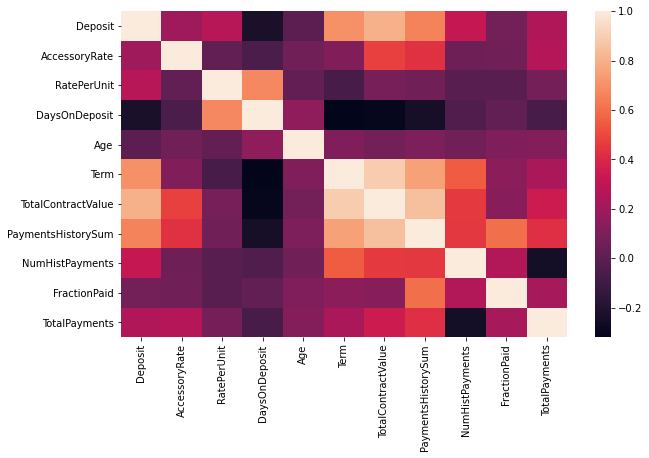

In [99]:
# visualize correlation matrix in Seaborn using a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(train2.corr(), ax=ax)

In [106]:
# Analysing skewdness
nm_feats = train2.dtypes[train2.dtypes!="object"].index
skewd_feats = train2[nm_feats].skew().sort_values(ascending=False)
skewdness = pd.DataFrame({"skew":skewd_feats})
skewdness

<ipython-input-106-5f0c152e1bfc>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewd_feats = train2[nm_feats].skew().sort_values(ascending=False)


,skew
RatePerUnit,32.653285
DaysOnDeposit,11.030040
AccessoryRate,9.095669
TotalPayments,4.042179
PaymentsHistorySum,1.213419
TotalContractValue,0.984897
Age,0.903428
NumHistPayments,0.653433
Deposit,0.593342
Term,-0.046165


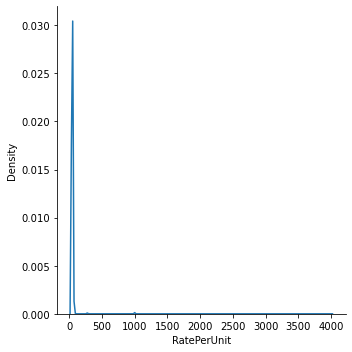

In [132]:
sns.displot(data=train2, x="RatePerUnit", kind="kde")

In [151]:
rpu_log = np.log(train2["RatePerUnit"])
rpu_log.skew()

6.761907566676305

In [159]:
len(rpu_log)

28007

In [200]:
from scipy import stats
boxcox_sqrt = stats.boxcox(train2["RatePerUnit"])
pd.Series(rpu_sqrt).skew()

15.974993142334577

In [160]:
# Custom numerical transformer
class NumericalTransformer3(BaseEstimator, TransformerMixin):
    def __init__(self, PaymentsHistorySum=True, NumHistPayments=True, FractionPaid=True):
        self.PaymentsHistorySum = PaymentsHistorySum
        self.NumHistPayments = NumHistPayments
        self.FractionPaid = FractionPaid
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        import numpy as np
        import pandas as pd
        X_ = X.copy() # Avoid distorting original dataset
        if self.PaymentsHistorySum: # Check if needed
            X_.loc[:, "PaymentsHistory"] = X_.loc[:, "PaymentsHistory"].apply(eval)
            X_.loc[:, "PaymentsHistorySum"] = [sum(i) for i in X_.loc[:, "PaymentsHistory"].tolist()]
            
        if self.NumHistPayments:
            X_.loc[:, "NumHistPayments"] = [len(i) for i in X_.loc[:, "PaymentsHistory"].tolist()]
            X_.drop("PaymentsHistory", axis=1, inplace=True)
            
        if self.FractionPaid: # computing fraction paid so far
            X_.loc[:, "FractionPaid"] = X_.loc[:, "PaymentsHistorySum"] / X_.loc[:, "TotalContractValue"]
        # Dealing with skewdness
        X_.loc[:, "RatePerUnit"] = list(np.log(X_["RatePerUnit"]))
        X_.loc[:, "DaysOnDeposit"] = list(np.log(X_["DaysOnDeposit"])) 
        X_.loc[:, "AccessoryRate"] = list(np.log(X_["AccessoryRate"]))

        # converting any infinty values in the dataset to nan values
        X_ = X_.replace([np.inf, -np.inf], np.nan)
        return X_.values

In [146]:
# Custom numerical transformer
class CategoricalTransformer3(BaseEstimator, TransformerMixin):
    def __init__(self, Upsell = True, FirstPaymentDateMonth=True, FirstPaymentDateYear=True, LastPaymentDateMonth=True,
                LastPaymentDateYear=True, RegisteredAtMonthStart=True, RegisteredAtMonthEnd=True): #RegisteredInLeapYear=True
        self.Upsell = Upsell
        self.FirstPaymentDateMonth = FirstPaymentDateMonth
        self.FirstPaymentDateYear = FirstPaymentDateYear
        self.LastPaymentDateMonth = LastPaymentDateMonth
        self.LastPaymentDateYear = LastPaymentDateYear 
        self.RegisteredAtMonthStart = RegisteredAtMonthStart
        self.RegisteredAtMonthEnd = RegisteredAtMonthEnd
          
    def fit(self, X, y=None):
        return self 
    
    def get_dates(self, dates_list):
        # Helper function to return first and last transaction dates
        import pandas as pd
        first = []
        last = []
        for i in dates_list:
            first.append(i[0])
            last.append(i[len(i)-1])
        return pd.DataFrame({"FirstPaymentDate": first, "LastPaymentDate": last}, dtype="datetime64[ns]") 
    
    def transform(self, X, y=None):
        import pandas as pd
        X_ = X.copy() # Avoid distorting original dataset
        # Eliminting the string type x-tics from the TransactionDates Series
        X_.loc[:, "TransactionDates"] = X_.loc[:, "TransactionDates"].apply(eval)
        # Creating a list of the TransactionDates feature
        trans_dates = X_.loc[:, "TransactionDates"].tolist()
        # A copy of the returned dataframe of FirstPaymentDate and LastPaymentDate
        fl_date_df = self.get_dates(trans_dates)

        if self.LastPaymentDateMonth: # Check if needed
            X_.loc[:, "LastPaymentDateMonth"] = pd.to_datetime(fl_date_df.loc[:, "LastPaymentDate"]).dt.month
        
        if self.LastPaymentDateYear:
            X_.loc[:, "LastPaymentDateYear"] = pd.to_datetime(fl_date_df.loc[:, "LastPaymentDate"]).dt.year 
        
        # Dropping the TransactionDates column    
        if any([self.LastPaymentDateMonth, self.LastPaymentDateYear]):
            X_.drop("TransactionDates", axis=1, inplace=True)
       
        
        # Filling NaT values with 0 in UpsellDate
        X_.UpsellDate.fillna(0, inplace=True)

        if self.Upsell: # Check if needed
            X_.loc[:, "Upsell"] = ''
            # Filling up the Upsell column with Yes-No values 
            X_.loc[X_.UpsellDate != 0, "Upsell"] = 1
            X_.loc[X_.UpsellDate == 0, "Upsell"] = 0
            X_.loc[:, "Upsell"] = pd.Categorical(X_.loc[:, "Upsell"])
            X_.drop("UpsellDate", axis=1, inplace=True)

        # Registration date
        X_["RegistrationDate"] = pd.to_datetime(X_["RegistrationDate"])
        #if self.RegisteredInLeapYear:
            #X_['RegisteredInLeapYear'] = X_["RegistrationDate"].dt.is_leap_year
        if self.RegisteredAtMonthStart:
            X_['RegisteredAtMonthStart'] = X_["RegistrationDate"].dt.is_month_start
        if self.RegisteredAtMonthEnd:
            X_['RegisteredAtMonthEnd'] = X_["RegistrationDate"].dt.is_month_end
        if any([self.RegisteredAtMonthStart, self.RegisteredAtMonthEnd]):#, self.RegisteredInLeapYear]):
            X_.drop("RegistrationDate", axis=1, inplace=True)
        
        if self.FirstPaymentDateMonth:
            #Creating new First month column from LastPaymentDate feature 
            X_.loc[:, "FirstPaymentDateMonth"] = pd.to_datetime(X_.loc[:, "FirstPaymentDate"]).dt.month
        
        if self.FirstPaymentDateYear:
            # Creating new First Year column from FirstPaymentDate feature 
            X_.loc[:, "FirstPaymentDateYear"] = pd.to_datetime(X_.loc[:, "FirstPaymentDate"]).dt.year
        
        if any([self.FirstPaymentDateMonth, self.FirstPaymentDateYear]): 
            X_.drop("FirstPaymentDate", axis=1, inplace=True)
            
        # converting any infinty values in the dataset to nan values
        X_ = X_.replace([np.inf, -np.inf], np.nan)
        return X_.values

In [140]:
cat_features3 = cat_features2 + ["TransactionDates", "RegistrationDate"]

In [129]:
# num_features3 = ['Deposit', 'AccessoryRate', 'RatePerUnit', 'DaysOnDeposit', 'Age', 'Term', 'TotalContractValue',
#                  'PaymentsHistory', 'TransactionDates']

In [161]:
paymnts_hist = ["PaymentsHistory"]
#trans_dates_num = ["TransactionDates", "ExpectedTermDate"]
#trans_dates2 = ["TransactionDates", "PaymentsHistory", "TotalContractValue", "ExpectedTermDate", "Term"]

# Parallel numerical transformations
parall_num = ColumnTransformer([
    ("num_trans3", NumericalTransformer3(), num_features2),
    ("histpymnts_trans", PaymentsHistStatsTransformer(), paymnts_hist),
    ("transdates_stats", TransDatesStatsTransformer(), trans_dates)
    
])

parall_cat = ColumnTransformer([
    ("cat_trans", CategoricalTransformer2(), cat_features2),
    ("transdates_cat", TransDatesTransformerCat(), trans_dates)
])

#Numerical pipeline
num_pipe = Pipeline([
    ("parall_num", parall_num),
    ("imputer", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler())
])

#Categorical pipeline
cat_pipe = Pipeline([
    ("parall_cat", parall_cat),
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder())  
])

# Combined pipeline with parallel transformations
cat_num_pipeline = FeatureUnion([
    ("num_pipe", num_pipe),
    ("cat_pipe", cat_pipe)
])

# Model 6
model_6 = Pipeline([
    ("cat_num_pipeline", cat_num_pipeline),
    #("estimator", RandomForestRegressor(n_jobs=4))
    ("wrapper", RegressorChain(CatBoostRegressor(), order=[0,1,2,3,4,5]))
])

# ("wrapper", RegressorChain(LinearRegression(n_jobs=4), order=[0,1,2,3,4,5]))
# LinearRegression
# RandomForestRegressor(n_jobs=4)
#  KNeighborsRegressor, GradientBoostingRegressor, XGBRegressor, LGBMRegressor, CatBoostRegressor

In [162]:
model_6.fit(X_train, y_train)

/home/shangchi/anaconda3/envs/marvel/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Learning rate set to 0.067108
0:	learn: 696.9210599	total: 8.73ms	remaining: 8.72s
1:	learn: 680.4326593	total: 15.7ms	remaining: 7.81s
2:	learn: 666.1849389	total: 20.1ms	remaining: 6.7s
3:	learn: 653.4090378	total: 27.1ms	remaining: 6.74s
4:	learn: 641.1358988	total: 33.9ms	remaining: 6.75s
5:	learn: 629.8191700	total: 40.6ms	remaining: 6.73s
6:	learn: 619.8530138	total: 46.7ms	remaining: 6.62s
7:	learn: 610.8501673	total: 55.4ms	remaining: 6.87s
8:	learn: 602.2643006	total: 60.2ms	remaining: 6.62s
9:	learn: 594.3310489	total: 65ms	remaining: 6.44s
10:	learn: 587.6086332	total: 70.1ms	remaining: 6.3s
11:	learn: 581.9718318	total: 74.9ms	remaining: 6.16s
12:	learn: 575.8241557	total: 79.7ms	remaining: 6.05s
13:	learn: 569.8524314	total: 84.4ms	remaining: 5.94s
14:	learn: 565.3565342	total: 90.7ms	remaining: 5.96s
15:	learn: 561.4157340	total: 95.7ms	remaining: 5.88s
16:	learn: 558.2285309	total: 102ms	remaining: 5.9s
17:	learn: 552.7385717	total: 108ms	remaining: 5.89s
18:	learn: 548.

187:	learn: 422.8496334	total: 1.09s	remaining: 4.7s
188:	learn: 422.3890469	total: 1.09s	remaining: 4.69s
189:	learn: 421.8788215	total: 1.1s	remaining: 4.68s
190:	learn: 421.2142117	total: 1.1s	remaining: 4.67s
191:	learn: 421.1533666	total: 1.11s	remaining: 4.66s
192:	learn: 421.1017175	total: 1.11s	remaining: 4.66s
193:	learn: 421.0025716	total: 1.12s	remaining: 4.64s
194:	learn: 420.9006343	total: 1.12s	remaining: 4.64s
195:	learn: 420.4650825	total: 1.13s	remaining: 4.63s
196:	learn: 420.0596170	total: 1.13s	remaining: 4.62s
197:	learn: 419.7736487	total: 1.14s	remaining: 4.61s
198:	learn: 419.5065608	total: 1.14s	remaining: 4.6s
199:	learn: 419.4207679	total: 1.15s	remaining: 4.59s
200:	learn: 419.3679345	total: 1.15s	remaining: 4.57s
201:	learn: 419.2424769	total: 1.16s	remaining: 4.56s
202:	learn: 418.9724916	total: 1.16s	remaining: 4.55s
203:	learn: 418.4158430	total: 1.16s	remaining: 4.54s
204:	learn: 417.7786772	total: 1.17s	remaining: 4.53s
205:	learn: 417.6123840	total: 1

345:	learn: 381.7152582	total: 1.9s	remaining: 3.6s
346:	learn: 381.3583065	total: 1.91s	remaining: 3.59s
347:	learn: 381.3357849	total: 1.91s	remaining: 3.58s
348:	learn: 381.2358452	total: 1.92s	remaining: 3.58s
349:	learn: 380.7809022	total: 1.92s	remaining: 3.57s
350:	learn: 380.4478959	total: 1.93s	remaining: 3.57s
351:	learn: 380.3836336	total: 1.94s	remaining: 3.56s
352:	learn: 380.3612854	total: 1.94s	remaining: 3.56s
353:	learn: 380.3182537	total: 1.95s	remaining: 3.55s
354:	learn: 379.5283172	total: 1.95s	remaining: 3.54s
355:	learn: 379.4083509	total: 1.95s	remaining: 3.54s
356:	learn: 379.2562404	total: 1.96s	remaining: 3.53s
357:	learn: 379.1608783	total: 1.96s	remaining: 3.52s
358:	learn: 378.7493377	total: 1.97s	remaining: 3.51s
359:	learn: 378.6234448	total: 1.97s	remaining: 3.5s
360:	learn: 378.5030126	total: 1.98s	remaining: 3.5s
361:	learn: 378.3331889	total: 1.98s	remaining: 3.49s
362:	learn: 378.3045491	total: 1.98s	remaining: 3.48s
363:	learn: 378.1393666	total: 1

499:	learn: 360.2214352	total: 2.71s	remaining: 2.71s
500:	learn: 360.2081323	total: 2.72s	remaining: 2.71s
501:	learn: 360.1216492	total: 2.73s	remaining: 2.71s
502:	learn: 360.0289195	total: 2.73s	remaining: 2.7s
503:	learn: 359.9129275	total: 2.74s	remaining: 2.7s
504:	learn: 359.8178451	total: 2.75s	remaining: 2.69s
505:	learn: 359.8018117	total: 2.76s	remaining: 2.69s
506:	learn: 359.7855188	total: 2.77s	remaining: 2.69s
507:	learn: 359.7064253	total: 2.77s	remaining: 2.68s
508:	learn: 359.5369936	total: 2.78s	remaining: 2.68s
509:	learn: 359.4513664	total: 2.79s	remaining: 2.68s
510:	learn: 359.3992451	total: 2.79s	remaining: 2.67s
511:	learn: 359.3679479	total: 2.8s	remaining: 2.67s
512:	learn: 359.3541978	total: 2.8s	remaining: 2.66s
513:	learn: 358.9855750	total: 2.81s	remaining: 2.66s
514:	learn: 358.9300163	total: 2.82s	remaining: 2.65s
515:	learn: 358.8441619	total: 2.82s	remaining: 2.65s
516:	learn: 358.7234876	total: 2.83s	remaining: 2.64s
517:	learn: 358.6812741	total: 2

669:	learn: 345.7079125	total: 3.71s	remaining: 1.83s
670:	learn: 345.6251302	total: 3.72s	remaining: 1.82s
671:	learn: 345.4699655	total: 3.73s	remaining: 1.82s
672:	learn: 345.4129546	total: 3.73s	remaining: 1.81s
673:	learn: 345.3207252	total: 3.74s	remaining: 1.81s
674:	learn: 345.2747075	total: 3.75s	remaining: 1.8s
675:	learn: 345.1626370	total: 3.75s	remaining: 1.8s
676:	learn: 345.1134953	total: 3.75s	remaining: 1.79s
677:	learn: 345.0714216	total: 3.76s	remaining: 1.78s
678:	learn: 344.9466479	total: 3.76s	remaining: 1.78s
679:	learn: 344.8715378	total: 3.77s	remaining: 1.77s
680:	learn: 344.7264558	total: 3.77s	remaining: 1.77s
681:	learn: 344.6353506	total: 3.78s	remaining: 1.76s
682:	learn: 344.5454056	total: 3.78s	remaining: 1.76s
683:	learn: 344.5173997	total: 3.79s	remaining: 1.75s
684:	learn: 344.4624547	total: 3.79s	remaining: 1.74s
685:	learn: 344.4081606	total: 3.8s	remaining: 1.74s
686:	learn: 344.3309736	total: 3.8s	remaining: 1.73s
687:	learn: 344.2896066	total: 3

823:	learn: 334.7488950	total: 4.53s	remaining: 967ms
824:	learn: 334.6917639	total: 4.53s	remaining: 962ms
825:	learn: 334.6786951	total: 4.54s	remaining: 956ms
826:	learn: 334.6375669	total: 4.54s	remaining: 951ms
827:	learn: 334.5845406	total: 4.55s	remaining: 945ms
828:	learn: 334.4501197	total: 4.55s	remaining: 939ms
829:	learn: 334.3615993	total: 4.56s	remaining: 935ms
830:	learn: 334.2829809	total: 4.57s	remaining: 929ms
831:	learn: 334.2422099	total: 4.57s	remaining: 924ms
832:	learn: 334.1610463	total: 4.58s	remaining: 918ms
833:	learn: 334.1021224	total: 4.58s	remaining: 913ms
834:	learn: 334.1009743	total: 4.59s	remaining: 907ms
835:	learn: 333.9932823	total: 4.59s	remaining: 901ms
836:	learn: 333.9514517	total: 4.6s	remaining: 896ms
837:	learn: 333.8571871	total: 4.61s	remaining: 890ms
838:	learn: 333.8089894	total: 4.61s	remaining: 885ms
839:	learn: 333.7839017	total: 4.62s	remaining: 879ms
840:	learn: 333.7030781	total: 4.62s	remaining: 874ms
841:	learn: 333.6258163	total

977:	learn: 324.9083468	total: 5.36s	remaining: 121ms
978:	learn: 324.8896111	total: 5.36s	remaining: 115ms
979:	learn: 324.8554059	total: 5.37s	remaining: 110ms
980:	learn: 324.8011048	total: 5.37s	remaining: 104ms
981:	learn: 324.7291264	total: 5.38s	remaining: 98.6ms
982:	learn: 324.6899371	total: 5.39s	remaining: 93.2ms
983:	learn: 324.6455455	total: 5.39s	remaining: 87.7ms
984:	learn: 324.6093450	total: 5.4s	remaining: 82.2ms
985:	learn: 324.5558132	total: 5.41s	remaining: 76.8ms
986:	learn: 324.5210884	total: 5.41s	remaining: 71.3ms
987:	learn: 324.4822885	total: 5.42s	remaining: 65.8ms
988:	learn: 324.4157226	total: 5.42s	remaining: 60.3ms
989:	learn: 324.3580761	total: 5.43s	remaining: 54.9ms
990:	learn: 324.3207104	total: 5.43s	remaining: 49.4ms
991:	learn: 324.2736457	total: 5.44s	remaining: 43.9ms
992:	learn: 324.2465069	total: 5.45s	remaining: 38.4ms
993:	learn: 324.1686161	total: 5.46s	remaining: 32.9ms
994:	learn: 324.1257382	total: 5.46s	remaining: 27.4ms
995:	learn: 324

143:	learn: 400.7361805	total: 938ms	remaining: 5.58s
144:	learn: 399.9797909	total: 945ms	remaining: 5.57s
145:	learn: 399.6375769	total: 956ms	remaining: 5.59s
146:	learn: 399.4818296	total: 961ms	remaining: 5.58s
147:	learn: 398.6032843	total: 980ms	remaining: 5.64s
148:	learn: 398.3443402	total: 986ms	remaining: 5.63s
149:	learn: 397.6584516	total: 996ms	remaining: 5.64s
150:	learn: 397.5561154	total: 1s	remaining: 5.63s
151:	learn: 397.0027005	total: 1.01s	remaining: 5.62s
152:	learn: 396.3213435	total: 1.01s	remaining: 5.6s
153:	learn: 395.6302957	total: 1.02s	remaining: 5.59s
154:	learn: 394.9667694	total: 1.02s	remaining: 5.59s
155:	learn: 394.8698990	total: 1.03s	remaining: 5.59s
156:	learn: 394.2404521	total: 1.04s	remaining: 5.57s
157:	learn: 393.5283507	total: 1.04s	remaining: 5.56s
158:	learn: 393.4997147	total: 1.05s	remaining: 5.56s
159:	learn: 392.7121253	total: 1.06s	remaining: 5.56s
160:	learn: 392.0363709	total: 1.06s	remaining: 5.55s
161:	learn: 391.3954734	total: 1

309:	learn: 354.4757037	total: 1.94s	remaining: 4.33s
310:	learn: 354.1653033	total: 1.95s	remaining: 4.32s
311:	learn: 354.1115917	total: 1.95s	remaining: 4.31s
312:	learn: 354.0205038	total: 1.96s	remaining: 4.3s
313:	learn: 353.8143985	total: 1.97s	remaining: 4.29s
314:	learn: 353.4278477	total: 1.97s	remaining: 4.29s
315:	learn: 353.2984680	total: 1.98s	remaining: 4.28s
316:	learn: 352.8574254	total: 1.98s	remaining: 4.27s
317:	learn: 352.7124184	total: 1.99s	remaining: 4.26s
318:	learn: 352.5823311	total: 1.99s	remaining: 4.25s
319:	learn: 352.2926614	total: 2s	remaining: 4.24s
320:	learn: 352.2423713	total: 2s	remaining: 4.23s
321:	learn: 352.1782582	total: 2.01s	remaining: 4.22s
322:	learn: 352.0602523	total: 2.01s	remaining: 4.22s
323:	learn: 351.9435784	total: 2.02s	remaining: 4.21s
324:	learn: 351.6011323	total: 2.02s	remaining: 4.2s
325:	learn: 351.5195591	total: 2.03s	remaining: 4.19s
326:	learn: 351.3708636	total: 2.03s	remaining: 4.18s
327:	learn: 351.3204371	total: 2.03s

463:	learn: 333.7111309	total: 2.76s	remaining: 3.18s
464:	learn: 333.4325169	total: 2.76s	remaining: 3.18s
465:	learn: 333.1628698	total: 2.77s	remaining: 3.17s
466:	learn: 332.9995065	total: 2.77s	remaining: 3.17s
467:	learn: 332.9177638	total: 2.78s	remaining: 3.16s
468:	learn: 332.8721181	total: 2.78s	remaining: 3.15s
469:	learn: 332.7873677	total: 2.79s	remaining: 3.14s
470:	learn: 332.6239993	total: 2.79s	remaining: 3.14s
471:	learn: 332.5262906	total: 2.8s	remaining: 3.13s
472:	learn: 332.4475888	total: 2.81s	remaining: 3.13s
473:	learn: 332.3447913	total: 2.81s	remaining: 3.12s
474:	learn: 332.2621694	total: 2.81s	remaining: 3.11s
475:	learn: 331.9927875	total: 2.82s	remaining: 3.1s
476:	learn: 331.9380578	total: 2.82s	remaining: 3.1s
477:	learn: 331.9013507	total: 2.83s	remaining: 3.09s
478:	learn: 331.8369396	total: 2.83s	remaining: 3.08s
479:	learn: 331.5783938	total: 2.84s	remaining: 3.07s
480:	learn: 331.5427981	total: 2.84s	remaining: 3.07s
481:	learn: 331.4437242	total: 

626:	learn: 318.4699766	total: 3.57s	remaining: 2.12s
627:	learn: 318.4363762	total: 3.58s	remaining: 2.12s
628:	learn: 318.3369088	total: 3.58s	remaining: 2.11s
629:	learn: 318.2549860	total: 3.59s	remaining: 2.11s
630:	learn: 318.1157193	total: 3.6s	remaining: 2.1s
631:	learn: 318.0836270	total: 3.6s	remaining: 2.1s
632:	learn: 317.9782726	total: 3.61s	remaining: 2.09s
633:	learn: 317.8866375	total: 3.61s	remaining: 2.08s
634:	learn: 317.8045549	total: 3.62s	remaining: 2.08s
635:	learn: 317.7223870	total: 3.62s	remaining: 2.07s
636:	learn: 317.6812226	total: 3.63s	remaining: 2.07s
637:	learn: 317.6311187	total: 3.63s	remaining: 2.06s
638:	learn: 317.5287418	total: 3.63s	remaining: 2.05s
639:	learn: 317.4374067	total: 3.64s	remaining: 2.05s
640:	learn: 317.2511249	total: 3.65s	remaining: 2.04s
641:	learn: 317.1754030	total: 3.65s	remaining: 2.04s
642:	learn: 316.9944929	total: 3.65s	remaining: 2.03s
643:	learn: 316.9094618	total: 3.66s	remaining: 2.02s
644:	learn: 316.7110923	total: 3

785:	learn: 305.5590947	total: 4.38s	remaining: 1.19s
786:	learn: 305.5453865	total: 4.39s	remaining: 1.19s
787:	learn: 305.5082326	total: 4.39s	remaining: 1.18s
788:	learn: 305.4374169	total: 4.4s	remaining: 1.18s
789:	learn: 305.3469313	total: 4.41s	remaining: 1.17s
790:	learn: 305.3087424	total: 4.41s	remaining: 1.17s
791:	learn: 305.2699174	total: 4.42s	remaining: 1.16s
792:	learn: 305.0624673	total: 4.42s	remaining: 1.15s
793:	learn: 304.9312616	total: 4.43s	remaining: 1.15s
794:	learn: 304.8514373	total: 4.43s	remaining: 1.14s
795:	learn: 304.7700682	total: 4.44s	remaining: 1.14s
796:	learn: 304.7217967	total: 4.44s	remaining: 1.13s
797:	learn: 304.6584328	total: 4.45s	remaining: 1.13s
798:	learn: 304.5821177	total: 4.45s	remaining: 1.12s
799:	learn: 304.5284444	total: 4.46s	remaining: 1.11s
800:	learn: 304.4453850	total: 4.46s	remaining: 1.11s
801:	learn: 304.3473434	total: 4.47s	remaining: 1.1s
802:	learn: 304.3133398	total: 4.47s	remaining: 1.1s
803:	learn: 304.2600095	total: 

941:	learn: 295.5764372	total: 5.2s	remaining: 320ms
942:	learn: 295.5164014	total: 5.2s	remaining: 314ms
943:	learn: 295.4475971	total: 5.21s	remaining: 309ms
944:	learn: 295.4068519	total: 5.21s	remaining: 303ms
945:	learn: 295.3100645	total: 5.22s	remaining: 298ms
946:	learn: 295.2357392	total: 5.22s	remaining: 292ms
947:	learn: 295.1565519	total: 5.23s	remaining: 287ms
948:	learn: 295.1045697	total: 5.23s	remaining: 281ms
949:	learn: 295.0590047	total: 5.24s	remaining: 276ms
950:	learn: 295.0246694	total: 5.24s	remaining: 270ms
951:	learn: 294.9694126	total: 5.25s	remaining: 265ms
952:	learn: 294.9138770	total: 5.25s	remaining: 259ms
953:	learn: 294.8767726	total: 5.26s	remaining: 253ms
954:	learn: 294.7411219	total: 5.26s	remaining: 248ms
955:	learn: 294.6706704	total: 5.27s	remaining: 242ms
956:	learn: 294.5953556	total: 5.27s	remaining: 237ms
957:	learn: 294.5357386	total: 5.28s	remaining: 231ms
958:	learn: 294.5015718	total: 5.28s	remaining: 226ms
959:	learn: 294.4542112	total:

126:	learn: 390.9000953	total: 758ms	remaining: 5.21s
127:	learn: 390.7548047	total: 763ms	remaining: 5.2s
128:	learn: 390.5783542	total: 768ms	remaining: 5.19s
129:	learn: 389.6791696	total: 773ms	remaining: 5.18s
130:	learn: 389.3698172	total: 778ms	remaining: 5.16s
131:	learn: 388.9899907	total: 784ms	remaining: 5.16s
132:	learn: 388.7031616	total: 789ms	remaining: 5.14s
133:	learn: 388.6251256	total: 795ms	remaining: 5.13s
134:	learn: 387.9854972	total: 799ms	remaining: 5.12s
135:	learn: 387.6722886	total: 805ms	remaining: 5.11s
136:	learn: 386.9668590	total: 809ms	remaining: 5.1s
137:	learn: 386.8668594	total: 814ms	remaining: 5.08s
138:	learn: 386.6255464	total: 818ms	remaining: 5.07s
139:	learn: 386.1277148	total: 823ms	remaining: 5.06s
140:	learn: 385.9087414	total: 828ms	remaining: 5.04s
141:	learn: 385.2936673	total: 832ms	remaining: 5.03s
142:	learn: 385.1519328	total: 837ms	remaining: 5.01s
143:	learn: 385.0262538	total: 842ms	remaining: 5s
144:	learn: 384.8573811	total: 84

296:	learn: 348.0675958	total: 1.59s	remaining: 3.76s
297:	learn: 347.9610709	total: 1.59s	remaining: 3.75s
298:	learn: 347.7745718	total: 1.6s	remaining: 3.75s
299:	learn: 347.6586831	total: 1.6s	remaining: 3.74s
300:	learn: 347.5514484	total: 1.61s	remaining: 3.74s
301:	learn: 347.4609980	total: 1.62s	remaining: 3.74s
302:	learn: 347.3857506	total: 1.62s	remaining: 3.73s
303:	learn: 347.1993117	total: 1.63s	remaining: 3.72s
304:	learn: 347.0671238	total: 1.63s	remaining: 3.71s
305:	learn: 346.6924124	total: 1.64s	remaining: 3.71s
306:	learn: 346.4133829	total: 1.64s	remaining: 3.7s
307:	learn: 346.1975991	total: 1.65s	remaining: 3.7s
308:	learn: 346.1374641	total: 1.65s	remaining: 3.69s
309:	learn: 346.0769780	total: 1.65s	remaining: 3.68s
310:	learn: 345.9722657	total: 1.66s	remaining: 3.67s
311:	learn: 345.9290991	total: 1.66s	remaining: 3.67s
312:	learn: 345.7882998	total: 1.67s	remaining: 3.66s
313:	learn: 345.6237072	total: 1.67s	remaining: 3.65s
314:	learn: 345.4627373	total: 1

465:	learn: 324.9618231	total: 2.41s	remaining: 2.76s
466:	learn: 324.8604595	total: 2.42s	remaining: 2.76s
467:	learn: 324.7510173	total: 2.42s	remaining: 2.75s
468:	learn: 324.5771451	total: 2.43s	remaining: 2.75s
469:	learn: 324.5408224	total: 2.43s	remaining: 2.74s
470:	learn: 324.4726587	total: 2.44s	remaining: 2.74s
471:	learn: 324.3966071	total: 2.44s	remaining: 2.73s
472:	learn: 324.3303538	total: 2.45s	remaining: 2.73s
473:	learn: 324.2554936	total: 2.46s	remaining: 2.72s
474:	learn: 324.0925719	total: 2.46s	remaining: 2.72s
475:	learn: 323.9757080	total: 2.46s	remaining: 2.71s
476:	learn: 323.7898397	total: 2.47s	remaining: 2.71s
477:	learn: 323.6089834	total: 2.48s	remaining: 2.7s
478:	learn: 323.5332020	total: 2.48s	remaining: 2.7s
479:	learn: 323.3391344	total: 2.49s	remaining: 2.69s
480:	learn: 323.2751691	total: 2.49s	remaining: 2.69s
481:	learn: 323.2276786	total: 2.5s	remaining: 2.68s
482:	learn: 323.0795649	total: 2.5s	remaining: 2.68s
483:	learn: 323.0153426	total: 2

627:	learn: 309.9454608	total: 3.22s	remaining: 1.91s
628:	learn: 309.8939822	total: 3.23s	remaining: 1.9s
629:	learn: 309.8276660	total: 3.23s	remaining: 1.9s
630:	learn: 309.7728496	total: 3.24s	remaining: 1.89s
631:	learn: 309.7036867	total: 3.24s	remaining: 1.89s
632:	learn: 309.6113740	total: 3.25s	remaining: 1.88s
633:	learn: 309.4883154	total: 3.25s	remaining: 1.88s
634:	learn: 309.4307871	total: 3.26s	remaining: 1.87s
635:	learn: 309.2877995	total: 3.27s	remaining: 1.87s
636:	learn: 309.2597647	total: 3.27s	remaining: 1.86s
637:	learn: 309.1782853	total: 3.27s	remaining: 1.86s
638:	learn: 309.1206056	total: 3.28s	remaining: 1.85s
639:	learn: 309.0582496	total: 3.28s	remaining: 1.85s
640:	learn: 309.0205443	total: 3.29s	remaining: 1.84s
641:	learn: 308.9260762	total: 3.29s	remaining: 1.84s
642:	learn: 308.8058250	total: 3.3s	remaining: 1.83s
643:	learn: 308.7820247	total: 3.3s	remaining: 1.82s
644:	learn: 308.6819860	total: 3.31s	remaining: 1.82s
645:	learn: 308.6764474	total: 3

788:	learn: 297.6632860	total: 4.04s	remaining: 1.08s
789:	learn: 297.6377267	total: 4.05s	remaining: 1.08s
790:	learn: 297.6086767	total: 4.05s	remaining: 1.07s
791:	learn: 297.5272843	total: 4.06s	remaining: 1.07s
792:	learn: 297.4680719	total: 4.07s	remaining: 1.06s
793:	learn: 297.4032734	total: 4.07s	remaining: 1.06s
794:	learn: 297.3837442	total: 4.08s	remaining: 1.05s
795:	learn: 297.3125018	total: 4.08s	remaining: 1.05s
796:	learn: 297.2612182	total: 4.09s	remaining: 1.04s
797:	learn: 297.2399526	total: 4.09s	remaining: 1.03s
798:	learn: 297.1600346	total: 4.09s	remaining: 1.03s
799:	learn: 297.0601677	total: 4.1s	remaining: 1.02s
800:	learn: 296.9775437	total: 4.1s	remaining: 1.02s
801:	learn: 296.9263551	total: 4.11s	remaining: 1.01s
802:	learn: 296.9057576	total: 4.12s	remaining: 1.01s
803:	learn: 296.8728534	total: 4.12s	remaining: 1s
804:	learn: 296.8067447	total: 4.13s	remaining: 999ms
805:	learn: 296.7931267	total: 4.13s	remaining: 994ms
806:	learn: 296.7205560	total: 4.

957:	learn: 287.8883629	total: 4.86s	remaining: 213ms
958:	learn: 287.8368165	total: 4.87s	remaining: 208ms
959:	learn: 287.7882659	total: 4.87s	remaining: 203ms
960:	learn: 287.7444431	total: 4.88s	remaining: 198ms
961:	learn: 287.6923796	total: 4.88s	remaining: 193ms
962:	learn: 287.6215290	total: 4.89s	remaining: 188ms
963:	learn: 287.5849102	total: 4.89s	remaining: 183ms
964:	learn: 287.5714308	total: 4.9s	remaining: 178ms
965:	learn: 287.5237067	total: 4.91s	remaining: 173ms
966:	learn: 287.4838872	total: 4.91s	remaining: 168ms
967:	learn: 287.4446099	total: 4.92s	remaining: 163ms
968:	learn: 287.4247092	total: 4.92s	remaining: 157ms
969:	learn: 287.3335190	total: 4.93s	remaining: 152ms
970:	learn: 287.2569108	total: 4.93s	remaining: 147ms
971:	learn: 287.1989946	total: 4.93s	remaining: 142ms
972:	learn: 287.1773323	total: 4.94s	remaining: 137ms
973:	learn: 287.1176342	total: 4.94s	remaining: 132ms
974:	learn: 287.0844446	total: 4.95s	remaining: 127ms
975:	learn: 287.0473889	total

131:	learn: 412.1411840	total: 783ms	remaining: 5.15s
132:	learn: 412.0489898	total: 790ms	remaining: 5.15s
133:	learn: 411.7537823	total: 795ms	remaining: 5.14s
134:	learn: 411.5506858	total: 801ms	remaining: 5.13s
135:	learn: 410.8082190	total: 807ms	remaining: 5.13s
136:	learn: 410.4198029	total: 813ms	remaining: 5.12s
137:	learn: 410.3655149	total: 818ms	remaining: 5.11s
138:	learn: 410.0176951	total: 823ms	remaining: 5.09s
139:	learn: 409.9752125	total: 828ms	remaining: 5.09s
140:	learn: 409.8514641	total: 833ms	remaining: 5.07s
141:	learn: 409.6680373	total: 838ms	remaining: 5.06s
142:	learn: 409.3439641	total: 843ms	remaining: 5.05s
143:	learn: 408.8578526	total: 847ms	remaining: 5.04s
144:	learn: 408.5274752	total: 852ms	remaining: 5.02s
145:	learn: 408.2853334	total: 856ms	remaining: 5.01s
146:	learn: 408.0282725	total: 861ms	remaining: 4.99s
147:	learn: 407.9117350	total: 865ms	remaining: 4.98s
148:	learn: 407.8152052	total: 870ms	remaining: 4.97s
149:	learn: 407.0755975	tota

295:	learn: 374.7129607	total: 1.59s	remaining: 3.79s
296:	learn: 374.5199196	total: 1.6s	remaining: 3.79s
297:	learn: 374.4191555	total: 1.61s	remaining: 3.79s
298:	learn: 374.2688805	total: 1.61s	remaining: 3.78s
299:	learn: 374.1161985	total: 1.62s	remaining: 3.78s
300:	learn: 373.9878193	total: 1.62s	remaining: 3.77s
301:	learn: 373.8817660	total: 1.63s	remaining: 3.77s
302:	learn: 373.8032556	total: 1.63s	remaining: 3.76s
303:	learn: 373.6687874	total: 1.64s	remaining: 3.75s
304:	learn: 373.5794363	total: 1.64s	remaining: 3.75s
305:	learn: 373.4407111	total: 1.65s	remaining: 3.74s
306:	learn: 373.2968104	total: 1.65s	remaining: 3.73s
307:	learn: 372.8398637	total: 1.66s	remaining: 3.72s
308:	learn: 372.6639675	total: 1.66s	remaining: 3.72s
309:	learn: 372.3013764	total: 1.67s	remaining: 3.71s
310:	learn: 371.7572138	total: 1.67s	remaining: 3.71s
311:	learn: 371.4643011	total: 1.68s	remaining: 3.7s
312:	learn: 370.9536964	total: 1.68s	remaining: 3.69s
313:	learn: 370.6760867	total:

457:	learn: 349.9897727	total: 2.41s	remaining: 2.86s
458:	learn: 349.5584107	total: 2.42s	remaining: 2.85s
459:	learn: 349.4721676	total: 2.42s	remaining: 2.85s
460:	learn: 349.2269444	total: 2.43s	remaining: 2.84s
461:	learn: 349.1618542	total: 2.44s	remaining: 2.84s
462:	learn: 349.0890326	total: 2.44s	remaining: 2.83s
463:	learn: 348.9784866	total: 2.45s	remaining: 2.83s
464:	learn: 348.8789647	total: 2.45s	remaining: 2.82s
465:	learn: 348.8337089	total: 2.46s	remaining: 2.82s
466:	learn: 348.7156330	total: 2.46s	remaining: 2.81s
467:	learn: 348.6584195	total: 2.47s	remaining: 2.81s
468:	learn: 348.5792833	total: 2.47s	remaining: 2.8s
469:	learn: 348.4991405	total: 2.48s	remaining: 2.79s
470:	learn: 348.3314815	total: 2.48s	remaining: 2.79s
471:	learn: 348.2541562	total: 2.49s	remaining: 2.78s
472:	learn: 348.2079363	total: 2.49s	remaining: 2.77s
473:	learn: 347.8016648	total: 2.5s	remaining: 2.77s
474:	learn: 347.7234510	total: 2.5s	remaining: 2.76s
475:	learn: 347.5877133	total: 

612:	learn: 332.7256512	total: 3.23s	remaining: 2.04s
613:	learn: 332.6743351	total: 3.24s	remaining: 2.04s
614:	learn: 332.6192390	total: 3.25s	remaining: 2.04s
615:	learn: 332.3141734	total: 3.26s	remaining: 2.03s
616:	learn: 332.2250249	total: 3.27s	remaining: 2.03s
617:	learn: 331.9302442	total: 3.28s	remaining: 2.02s
618:	learn: 331.8776090	total: 3.28s	remaining: 2.02s
619:	learn: 331.8098981	total: 3.29s	remaining: 2.01s
620:	learn: 331.7722414	total: 3.29s	remaining: 2.01s
621:	learn: 331.6831250	total: 3.29s	remaining: 2s
622:	learn: 331.6112112	total: 3.3s	remaining: 2s
623:	learn: 331.4951014	total: 3.3s	remaining: 1.99s
624:	learn: 331.3032495	total: 3.31s	remaining: 1.99s
625:	learn: 331.2711491	total: 3.31s	remaining: 1.98s
626:	learn: 331.0387730	total: 3.32s	remaining: 1.97s
627:	learn: 330.7598540	total: 3.32s	remaining: 1.97s
628:	learn: 330.6646714	total: 3.33s	remaining: 1.96s
629:	learn: 330.6209637	total: 3.33s	remaining: 1.96s
630:	learn: 330.5059934	total: 3.34s

770:	learn: 317.8289694	total: 4.05s	remaining: 1.2s
771:	learn: 317.7451432	total: 4.06s	remaining: 1.2s
772:	learn: 317.7088859	total: 4.06s	remaining: 1.19s
773:	learn: 317.6567906	total: 4.07s	remaining: 1.19s
774:	learn: 317.5581314	total: 4.07s	remaining: 1.18s
775:	learn: 317.5132516	total: 4.08s	remaining: 1.18s
776:	learn: 317.4240677	total: 4.08s	remaining: 1.17s
777:	learn: 317.3915040	total: 4.09s	remaining: 1.17s
778:	learn: 317.3278716	total: 4.09s	remaining: 1.16s
779:	learn: 317.2230459	total: 4.1s	remaining: 1.16s
780:	learn: 317.1330152	total: 4.11s	remaining: 1.15s
781:	learn: 316.9980613	total: 4.11s	remaining: 1.15s
782:	learn: 316.9227072	total: 4.11s	remaining: 1.14s
783:	learn: 316.7395664	total: 4.12s	remaining: 1.14s
784:	learn: 316.6958270	total: 4.12s	remaining: 1.13s
785:	learn: 316.6360408	total: 4.13s	remaining: 1.12s
786:	learn: 316.5837952	total: 4.13s	remaining: 1.12s
787:	learn: 316.4422064	total: 4.14s	remaining: 1.11s
788:	learn: 316.3925993	total: 

934:	learn: 305.6896944	total: 4.86s	remaining: 338ms
935:	learn: 305.6200939	total: 4.87s	remaining: 333ms
936:	learn: 305.5765472	total: 4.87s	remaining: 328ms
937:	learn: 305.4797735	total: 4.88s	remaining: 323ms
938:	learn: 305.4474389	total: 4.88s	remaining: 317ms
939:	learn: 305.4117485	total: 4.89s	remaining: 312ms
940:	learn: 305.3799223	total: 4.9s	remaining: 307ms
941:	learn: 305.3146761	total: 4.9s	remaining: 302ms
942:	learn: 305.2305594	total: 4.91s	remaining: 297ms
943:	learn: 305.1175157	total: 4.91s	remaining: 291ms
944:	learn: 305.0633898	total: 4.92s	remaining: 286ms
945:	learn: 304.9954193	total: 4.92s	remaining: 281ms
946:	learn: 304.8589433	total: 4.93s	remaining: 276ms
947:	learn: 304.8241700	total: 4.93s	remaining: 271ms
948:	learn: 304.7419737	total: 4.94s	remaining: 265ms
949:	learn: 304.7022743	total: 4.94s	remaining: 260ms
950:	learn: 304.6650965	total: 4.95s	remaining: 255ms
951:	learn: 304.5838429	total: 4.95s	remaining: 250ms
952:	learn: 304.4864823	total:

104:	learn: 449.9421343	total: 586ms	remaining: 4.99s
105:	learn: 449.0854628	total: 592ms	remaining: 4.99s
106:	learn: 448.1181127	total: 597ms	remaining: 4.98s
107:	learn: 447.5371799	total: 602ms	remaining: 4.97s
108:	learn: 446.7273860	total: 609ms	remaining: 4.97s
109:	learn: 446.1464958	total: 615ms	remaining: 4.97s
110:	learn: 445.2504827	total: 620ms	remaining: 4.97s
111:	learn: 445.0484818	total: 625ms	remaining: 4.96s
112:	learn: 444.4268392	total: 631ms	remaining: 4.95s
113:	learn: 444.0899892	total: 636ms	remaining: 4.94s
114:	learn: 443.5115262	total: 641ms	remaining: 4.93s
115:	learn: 442.9488459	total: 646ms	remaining: 4.92s
116:	learn: 442.4744306	total: 651ms	remaining: 4.91s
117:	learn: 442.0253364	total: 655ms	remaining: 4.9s
118:	learn: 441.7401512	total: 660ms	remaining: 4.88s
119:	learn: 441.0538398	total: 664ms	remaining: 4.87s
120:	learn: 440.9134800	total: 669ms	remaining: 4.86s
121:	learn: 440.5181653	total: 673ms	remaining: 4.84s
122:	learn: 439.8237407	total

268:	learn: 393.9269702	total: 1.4s	remaining: 3.8s
269:	learn: 393.8404950	total: 1.4s	remaining: 3.79s
270:	learn: 393.5863905	total: 1.41s	remaining: 3.79s
271:	learn: 393.3885710	total: 1.41s	remaining: 3.78s
272:	learn: 393.2362462	total: 1.42s	remaining: 3.78s
273:	learn: 393.0310449	total: 1.43s	remaining: 3.78s
274:	learn: 392.6996895	total: 1.43s	remaining: 3.77s
275:	learn: 392.5560491	total: 1.44s	remaining: 3.77s
276:	learn: 392.3958437	total: 1.44s	remaining: 3.76s
277:	learn: 392.2152137	total: 1.45s	remaining: 3.75s
278:	learn: 391.8150559	total: 1.45s	remaining: 3.75s
279:	learn: 391.6230320	total: 1.45s	remaining: 3.74s
280:	learn: 391.3947797	total: 1.46s	remaining: 3.73s
281:	learn: 391.2214754	total: 1.46s	remaining: 3.73s
282:	learn: 390.7593278	total: 1.47s	remaining: 3.72s
283:	learn: 390.3362915	total: 1.47s	remaining: 3.72s
284:	learn: 390.1303680	total: 1.48s	remaining: 3.71s
285:	learn: 389.7353412	total: 1.48s	remaining: 3.7s
286:	learn: 389.5469080	total: 1

428:	learn: 361.8654486	total: 2.2s	remaining: 2.93s
429:	learn: 361.5803614	total: 2.21s	remaining: 2.93s
430:	learn: 361.4017416	total: 2.22s	remaining: 2.93s
431:	learn: 361.3267505	total: 2.22s	remaining: 2.92s
432:	learn: 361.1947426	total: 2.23s	remaining: 2.92s
433:	learn: 361.0971798	total: 2.23s	remaining: 2.91s
434:	learn: 360.9386833	total: 2.24s	remaining: 2.91s
435:	learn: 360.6470332	total: 2.24s	remaining: 2.9s
436:	learn: 360.4600575	total: 2.25s	remaining: 2.9s
437:	learn: 360.3203752	total: 2.25s	remaining: 2.89s
438:	learn: 360.1131634	total: 2.26s	remaining: 2.89s
439:	learn: 360.0196829	total: 2.26s	remaining: 2.88s
440:	learn: 359.8470870	total: 2.27s	remaining: 2.88s
441:	learn: 359.6943117	total: 2.27s	remaining: 2.87s
442:	learn: 359.6117443	total: 2.28s	remaining: 2.86s
443:	learn: 359.3591259	total: 2.28s	remaining: 2.86s
444:	learn: 359.3238874	total: 2.29s	remaining: 2.85s
445:	learn: 359.2423434	total: 2.29s	remaining: 2.85s
446:	learn: 359.0370923	total: 

583:	learn: 341.6748504	total: 3.03s	remaining: 2.16s
584:	learn: 341.5335021	total: 3.04s	remaining: 2.15s
585:	learn: 341.4230894	total: 3.04s	remaining: 2.15s
586:	learn: 341.3809661	total: 3.05s	remaining: 2.15s
587:	learn: 341.2346847	total: 3.06s	remaining: 2.14s
588:	learn: 341.1441794	total: 3.06s	remaining: 2.14s
589:	learn: 341.0498747	total: 3.07s	remaining: 2.13s
590:	learn: 340.9795075	total: 3.07s	remaining: 2.13s
591:	learn: 340.9519105	total: 3.08s	remaining: 2.12s
592:	learn: 340.7284684	total: 3.08s	remaining: 2.12s
593:	learn: 340.6882187	total: 3.09s	remaining: 2.11s
594:	learn: 340.6439931	total: 3.09s	remaining: 2.1s
595:	learn: 340.5574104	total: 3.1s	remaining: 2.1s
596:	learn: 340.4703501	total: 3.1s	remaining: 2.09s
597:	learn: 340.4195486	total: 3.1s	remaining: 2.09s
598:	learn: 340.3431501	total: 3.11s	remaining: 2.08s
599:	learn: 340.3012451	total: 3.12s	remaining: 2.08s
600:	learn: 340.2395185	total: 3.12s	remaining: 2.07s
601:	learn: 340.1999194	total: 3.

745:	learn: 323.8906926	total: 3.85s	remaining: 1.31s
746:	learn: 323.8343959	total: 3.86s	remaining: 1.31s
747:	learn: 323.7260962	total: 3.86s	remaining: 1.3s
748:	learn: 323.6409101	total: 3.87s	remaining: 1.3s
749:	learn: 323.5766330	total: 3.88s	remaining: 1.29s
750:	learn: 323.4935126	total: 3.88s	remaining: 1.29s
751:	learn: 323.4441157	total: 3.89s	remaining: 1.28s
752:	learn: 323.4160277	total: 3.89s	remaining: 1.28s
753:	learn: 323.3800330	total: 3.9s	remaining: 1.27s
754:	learn: 323.3452657	total: 3.9s	remaining: 1.27s
755:	learn: 323.2439692	total: 3.91s	remaining: 1.26s
756:	learn: 323.0947544	total: 3.91s	remaining: 1.25s
757:	learn: 323.0039020	total: 3.92s	remaining: 1.25s
758:	learn: 322.9678376	total: 3.92s	remaining: 1.24s
759:	learn: 322.8568658	total: 3.92s	remaining: 1.24s
760:	learn: 322.6168046	total: 3.93s	remaining: 1.23s
761:	learn: 322.5831118	total: 3.93s	remaining: 1.23s
762:	learn: 322.4004180	total: 3.94s	remaining: 1.22s
763:	learn: 322.2850905	total: 3

906:	learn: 309.7028939	total: 4.67s	remaining: 479ms
907:	learn: 309.6297537	total: 4.67s	remaining: 474ms
908:	learn: 309.5397325	total: 4.68s	remaining: 469ms
909:	learn: 309.4054387	total: 4.69s	remaining: 464ms
910:	learn: 309.2956852	total: 4.69s	remaining: 458ms
911:	learn: 309.2222580	total: 4.7s	remaining: 453ms
912:	learn: 309.1450853	total: 4.7s	remaining: 448ms
913:	learn: 309.0933853	total: 4.71s	remaining: 443ms
914:	learn: 309.0091159	total: 4.71s	remaining: 438ms
915:	learn: 308.8742513	total: 4.72s	remaining: 433ms
916:	learn: 308.7377229	total: 4.72s	remaining: 428ms
917:	learn: 308.6424717	total: 4.73s	remaining: 422ms
918:	learn: 308.5359276	total: 4.73s	remaining: 417ms
919:	learn: 308.4884303	total: 4.74s	remaining: 412ms
920:	learn: 308.3372225	total: 4.74s	remaining: 407ms
921:	learn: 308.3125340	total: 4.75s	remaining: 402ms
922:	learn: 308.2047875	total: 4.75s	remaining: 397ms
923:	learn: 308.1546984	total: 4.76s	remaining: 391ms
924:	learn: 308.0501620	total:

62:	learn: 967.2343843	total: 426ms	remaining: 6.33s
63:	learn: 965.6648253	total: 432ms	remaining: 6.32s
64:	learn: 964.5648543	total: 438ms	remaining: 6.3s
65:	learn: 960.4510953	total: 443ms	remaining: 6.27s
66:	learn: 957.6749177	total: 449ms	remaining: 6.25s
67:	learn: 955.0716348	total: 456ms	remaining: 6.25s
68:	learn: 952.4540353	total: 462ms	remaining: 6.24s
69:	learn: 950.5473568	total: 468ms	remaining: 6.21s
70:	learn: 948.9281239	total: 473ms	remaining: 6.18s
71:	learn: 947.6578420	total: 478ms	remaining: 6.16s
72:	learn: 945.8203094	total: 483ms	remaining: 6.13s
73:	learn: 944.1575030	total: 488ms	remaining: 6.11s
74:	learn: 943.5349937	total: 493ms	remaining: 6.08s
75:	learn: 942.1386057	total: 497ms	remaining: 6.05s
76:	learn: 937.0059058	total: 502ms	remaining: 6.02s
77:	learn: 935.5146677	total: 507ms	remaining: 6s
78:	learn: 930.4274365	total: 512ms	remaining: 5.97s
79:	learn: 928.1967097	total: 517ms	remaining: 5.95s
80:	learn: 926.2626297	total: 527ms	remaining: 5.9

216:	learn: 797.9036244	total: 1.25s	remaining: 4.52s
217:	learn: 797.0032643	total: 1.26s	remaining: 4.51s
218:	learn: 796.5355529	total: 1.26s	remaining: 4.51s
219:	learn: 794.9670377	total: 1.27s	remaining: 4.51s
220:	learn: 794.6721392	total: 1.28s	remaining: 4.5s
221:	learn: 793.6493522	total: 1.28s	remaining: 4.5s
222:	learn: 793.1810674	total: 1.29s	remaining: 4.49s
223:	learn: 793.0865976	total: 1.29s	remaining: 4.48s
224:	learn: 792.8342870	total: 1.3s	remaining: 4.47s
225:	learn: 792.4801743	total: 1.3s	remaining: 4.46s
226:	learn: 791.9314209	total: 1.31s	remaining: 4.45s
227:	learn: 791.2602337	total: 1.31s	remaining: 4.44s
228:	learn: 791.1729133	total: 1.32s	remaining: 4.43s
229:	learn: 790.5836104	total: 1.32s	remaining: 4.43s
230:	learn: 790.3019775	total: 1.33s	remaining: 4.42s
231:	learn: 788.2245593	total: 1.33s	remaining: 4.41s
232:	learn: 787.3961140	total: 1.34s	remaining: 4.4s
233:	learn: 786.9111006	total: 1.34s	remaining: 4.39s
234:	learn: 785.7042972	total: 1.

384:	learn: 698.6407066	total: 2.22s	remaining: 3.55s
385:	learn: 698.0961483	total: 2.23s	remaining: 3.54s
386:	learn: 697.8365211	total: 2.23s	remaining: 3.54s
387:	learn: 697.3648611	total: 2.24s	remaining: 3.53s
388:	learn: 696.6769686	total: 2.25s	remaining: 3.53s
389:	learn: 696.3615493	total: 2.25s	remaining: 3.52s
390:	learn: 695.8301996	total: 2.26s	remaining: 3.52s
391:	learn: 695.4061624	total: 2.26s	remaining: 3.51s
392:	learn: 695.0596282	total: 2.27s	remaining: 3.5s
393:	learn: 694.7809542	total: 2.27s	remaining: 3.5s
394:	learn: 694.2688718	total: 2.28s	remaining: 3.49s
395:	learn: 694.0861665	total: 2.28s	remaining: 3.48s
396:	learn: 693.8888176	total: 2.29s	remaining: 3.47s
397:	learn: 693.4361670	total: 2.29s	remaining: 3.47s
398:	learn: 692.9423725	total: 2.3s	remaining: 3.46s
399:	learn: 692.6564063	total: 2.3s	remaining: 3.45s
400:	learn: 692.0622987	total: 2.31s	remaining: 3.45s
401:	learn: 691.6255216	total: 2.31s	remaining: 3.44s
402:	learn: 691.4482460	total: 2

538:	learn: 633.2407350	total: 3.05s	remaining: 2.61s
539:	learn: 632.8798429	total: 3.06s	remaining: 2.61s
540:	learn: 632.4668760	total: 3.06s	remaining: 2.6s
541:	learn: 632.1066537	total: 3.07s	remaining: 2.59s
542:	learn: 631.6520863	total: 3.08s	remaining: 2.59s
543:	learn: 631.4991177	total: 3.08s	remaining: 2.58s
544:	learn: 631.3627567	total: 3.09s	remaining: 2.58s
545:	learn: 631.1293841	total: 3.09s	remaining: 2.57s
546:	learn: 630.7484909	total: 3.1s	remaining: 2.56s
547:	learn: 629.9813425	total: 3.1s	remaining: 2.56s
548:	learn: 629.2492332	total: 3.11s	remaining: 2.55s
549:	learn: 628.9184692	total: 3.11s	remaining: 2.55s
550:	learn: 628.7038722	total: 3.12s	remaining: 2.54s
551:	learn: 628.2273857	total: 3.12s	remaining: 2.53s
552:	learn: 627.7820430	total: 3.13s	remaining: 2.53s
553:	learn: 627.6695757	total: 3.13s	remaining: 2.52s
554:	learn: 626.8861578	total: 3.14s	remaining: 2.52s
555:	learn: 626.4600746	total: 3.14s	remaining: 2.51s
556:	learn: 626.1090406	total: 

696:	learn: 576.0315873	total: 3.88s	remaining: 1.69s
697:	learn: 575.9230257	total: 3.88s	remaining: 1.68s
698:	learn: 575.6775248	total: 3.89s	remaining: 1.68s
699:	learn: 575.4815491	total: 3.9s	remaining: 1.67s
700:	learn: 575.1675621	total: 3.91s	remaining: 1.67s
701:	learn: 574.9735786	total: 3.91s	remaining: 1.66s
702:	learn: 574.4722554	total: 3.92s	remaining: 1.65s
703:	learn: 574.3165490	total: 3.92s	remaining: 1.65s
704:	learn: 574.1520144	total: 3.93s	remaining: 1.64s
705:	learn: 573.8486663	total: 3.93s	remaining: 1.64s
706:	learn: 573.6679570	total: 3.94s	remaining: 1.63s
707:	learn: 573.1820353	total: 3.94s	remaining: 1.63s
708:	learn: 572.7230462	total: 3.95s	remaining: 1.62s
709:	learn: 572.6162803	total: 3.95s	remaining: 1.61s
710:	learn: 572.4368886	total: 3.96s	remaining: 1.61s
711:	learn: 571.9808694	total: 3.96s	remaining: 1.6s
712:	learn: 571.8739172	total: 3.97s	remaining: 1.6s
713:	learn: 571.7615813	total: 3.97s	remaining: 1.59s
714:	learn: 571.5630152	total: 

856:	learn: 536.2495683	total: 4.71s	remaining: 786ms
857:	learn: 536.1881681	total: 4.71s	remaining: 780ms
858:	learn: 535.8378380	total: 4.72s	remaining: 775ms
859:	learn: 535.7190705	total: 4.73s	remaining: 770ms
860:	learn: 535.5444678	total: 4.73s	remaining: 764ms
861:	learn: 534.8564425	total: 4.74s	remaining: 759ms
862:	learn: 534.4909416	total: 4.75s	remaining: 753ms
863:	learn: 534.4312593	total: 4.75s	remaining: 748ms
864:	learn: 534.0801509	total: 4.75s	remaining: 742ms
865:	learn: 533.6712923	total: 4.76s	remaining: 737ms
866:	learn: 533.4269708	total: 4.76s	remaining: 731ms
867:	learn: 533.1774931	total: 4.77s	remaining: 725ms
868:	learn: 532.9679465	total: 4.78s	remaining: 720ms
869:	learn: 532.6868993	total: 4.78s	remaining: 714ms
870:	learn: 532.4628603	total: 4.79s	remaining: 709ms
871:	learn: 532.3006208	total: 4.79s	remaining: 703ms
872:	learn: 532.2182846	total: 4.79s	remaining: 698ms
873:	learn: 531.8645758	total: 4.8s	remaining: 692ms
874:	learn: 531.6411359	total

Pipeline(steps=[('cat_num_pipeline',
                 FeatureUnion(transformer_list=[('num_pipe',
                                                 Pipeline(steps=[('parall_num',
                                                                  ColumnTransformer(transformers=[('num_trans3',
                                                                                                   NumericalTransformer3(),
                                                                                                   ['Deposit',
                                                                                                    'AccessoryRate',
                                                                                                    'RatePerUnit',
                                                                                                    'DaysOnDeposit',
                                                                                                    'Age',
                  

In [163]:
# Scores
print("Model 6 training score is {}" .format(model_6.score(X_train, y_train)))
print("Model 6 testing score is {}" .format(model_6.score(X_test, y_test)))

/home/shangchi/anaconda3/envs/marvel/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Model 6 training score is 0.6914371080588443


/home/shangchi/anaconda3/envs/marvel/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Model 6 testing score is 0.43725364369410685


In [195]:
# Creating seperate dataframe for all dates
tr_dates_df = train3["TransactionDates"].apply(pd.Series)
tr_dates_df = tr_dates_df.astype("datetime64[ns]")

def get_days(df): # returns a dataframe with number of days between transactions
    import pandas as pd
    df1 = pd.DataFrame()
    for i in range(len(df.columns)):
        df1 = pd.concat([df1, pd.Series((df.iloc[:, i] - df.iloc[:, i-1]).dt.total_seconds()/(60*60*24), name=i)],
                        axis=1)                   
    return df1

# A copy of the returned dataframe of days between transaction dates
df2 = get_days(tr_dates_df)

# Dropping the first column since it has NaN values
df2 = df2.drop(0, axis=1)

# Computing the mean days for each transaction history
dates_stats = df2.agg(["mean", "std", "median", "var"], axis=1)

# calculating the mode of the days between payments
mode_days = pd.Series(df2.mode(axis=1)[0], name="mode")

# Adding the mode_days to the rest of the dates dataframe
dates_stats = pd.concat([dates_stats, mode_days], axis=1)

In [217]:
len(dates_stats.loc[dates_stats["std"] <= 10])

22306

In [206]:
dates_stats["std"].min()

0.4879500364742666

In [ ]:
# Custom transformer to extract some statistical features from TransactionDates
class TransDatesStatsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, MeanDays=True, MedianDays=True, STD_Days=True):
        self.MeanDays = MeanDays
        self.STD_Days = STD_Days
        self.MedianDays = MedianDays
        
    def fit(self, X, y=None):
        return self 
    
    def get_days(self, df): # returns a dataframe with number of days between transactions
        import pandas as pd     #  when passed a dataframe of trans dates
        df1 = pd.DataFrame()
        for i in range(len(df.columns)):
            df1 = pd.concat([df1, pd.Series((df.iloc[:, i] - df.iloc[:, i-1]).dt.total_seconds()/(60*60*24), name=i)],
                            axis=1)                   
        return df1
    
    def transform(self, X, y=None):
        X_ = X.copy() # Avoid distorting original dataset
        # Eliminting the string type x-tics from the TransactionDates Series
        X_.loc[:, "TransactionDates"] = X_.loc[:, "TransactionDates"].apply(eval)
        
        # Creating seperate dataframe for all dates
        X_dates = X_.loc[:, "TransactionDates"].apply(pd.Series)
        X_dates = X_dates.astype("datetime64[ns]")
        # A copy of the returned dataframe of days between transaction dates
        X_days = self.get_days(X_dates)

        # Dropping the first column since it has NaN values
        X_days = X_days.drop(0, axis=1)

        # Computing the mean, std, median, var, mode days for each transaction history
        dates_stats = X_days.agg(["mean", "std", "median"], axis=1)

        if self.MeanDays: # Check if needed
            X_.loc[:, "MeanDays"] = dates_stats.loc[:, "mean"]
        
        if self.STD_Days:
            X_.loc[:, "STD_Days"] = dates_stats.loc[:, "std"]            
        
        if self.MedianDays:
            X_.loc[:, "MedianDays"] = dates_stats.loc[:, "median"]
       
        # Dropping the TransactionDates column
        if any([self.MeanDays, self.MedianDays, self.STD_Days]):
            X_.drop("TransactionDates", axis=1, inplace=True)
        
          
        # converting any infinty values in the dataset to nan values
        X_ = X_.replace([np.inf, -np.inf], np.nan)
        return X_.values

## Submission

In [ ]:
sub_preds_long["ID"] = sub_preds_long["ID"] + " x " + sub_preds_long["months"]
sub_preds_long.drop("months", axis=1, inplace=True)

In [ ]:
# dropping the m1 - m6 columns for Model 1
model_1_sub = sub.drop(monthly_payments, axis=1)

In [235]:
#Function to predict and convert into submission format
def make_submission(model_, test_set):
    monthly_payments = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6']
    test_set = test_set.drop(monthly_payments, axis=1)
    ids = test_set.ID.tolist() # collect ids of the test / submission set into a list
    y_pred = pd.DataFrame(data = model_.predict(test_set), columns=monthly_payments)
    y_pred.insert(0, column="ID", value=ids) # creating an "ID" column in the predicted dataset
    y_pred_long = y_pred.set_index("ID").stack().to_frame()\
                 .reset_index().rename(columns={'level_1': 'months', 0: 'Target'}) # reshaping the dataframe to submission format
    y_pred_long["ID"] = y_pred_long["ID"] + " x " + y_pred_long["months"] # combining the ID & months column
    y_pred_long.drop("months", axis=1, inplace=True)
    time_stamp = pd.Timestamp.now(tz='Africa/Kampala').strftime(format='%Y-%m-%d_%H-%M_')
    y_pred_long.to_csv(f'./data/{time_stamp}paygo_sub.csv', index=False)

In [236]:
make_submission(model_5, sub)